<a href="https://colab.research.google.com/github/IAMDSVSSANGRAL/classificationcapestone/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/IAMDSVSSANGRAL/classificationcapestone

# **Problem Statement**


The objective of this project is to develop a machine learning model that can predict whether a patient is at risk of developing coronary heart disease (CHD) within the next 10 years. The dataset used for this project contains records of over 4,000 patients from an ongoing cardiovascular study in Framingham, Massachusetts. Each record consists of 15 attributes, including demographic, behavioral, and medical risk factors.

The primary task is binary classification, where the target variable is "TenYearCHD," indicating whether a patient is at risk of CHD (1) or not (0). The features include attributes such as age, sex, education level, smoking status, blood pressure measurements, cholesterol levels, and more. The dataset may also contain missing values that need to be handled appropriately.

By building an accurate predictive model, this project aims to assist healthcare professionals in identifying individuals at higher risk of CHD, allowing for early intervention and tailored healthcare recommendations to reduce the incidence of cardiovascular diseases.

Key objectives for the project include data preprocessing, feature engineering, model selection, hyperparameter tuning, and evaluating the model's performance using appropriate metrics. The success of this project will be measured by the model's ability to predict CHD risk with a high degree of accuracy and reliability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

#assinging the path
path = "/content/drive/MyDrive/Santa/classification - capestone/data_cardiovascular_risk.csv"

#read data from a CSV file into a DataFrame.
data_raw = pd.read_csv(path)

#create a copy of raw data
df = data_raw.copy()

Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rows, columns = df.shape

# Print the number of rows and columns
print("Number of Rows:", rows)
print("Number of Columns:", columns)

Number of Rows: 3390
Number of Columns: 17


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

# Print the count of duplicate values
print("Duplicate Value Count:", duplicate_count)


Duplicate Value Count: 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values Count:")
print(missing_values_count)


Missing Values Count:
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [9]:
!pip install missingno

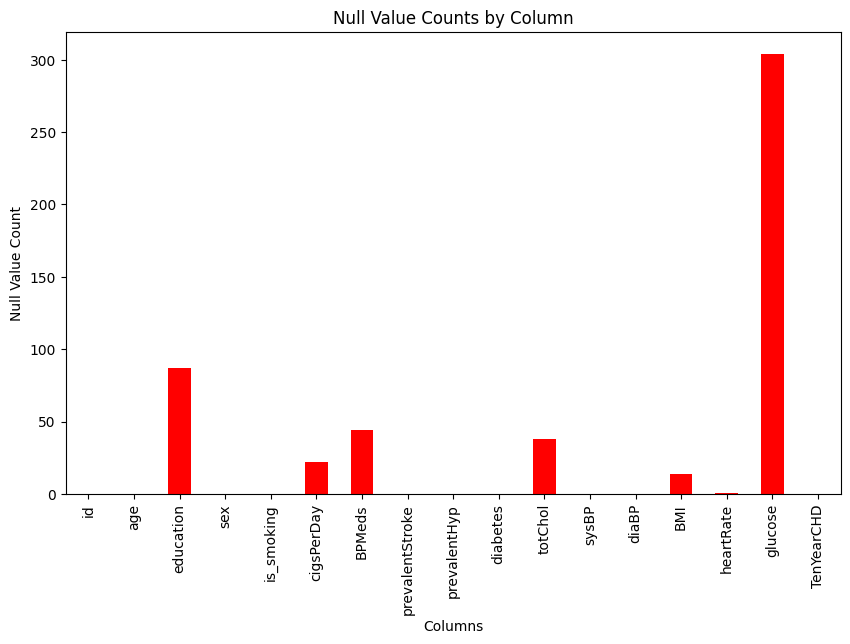

In [10]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
missing_values_count.plot(kind='bar', color='red')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts by Column')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

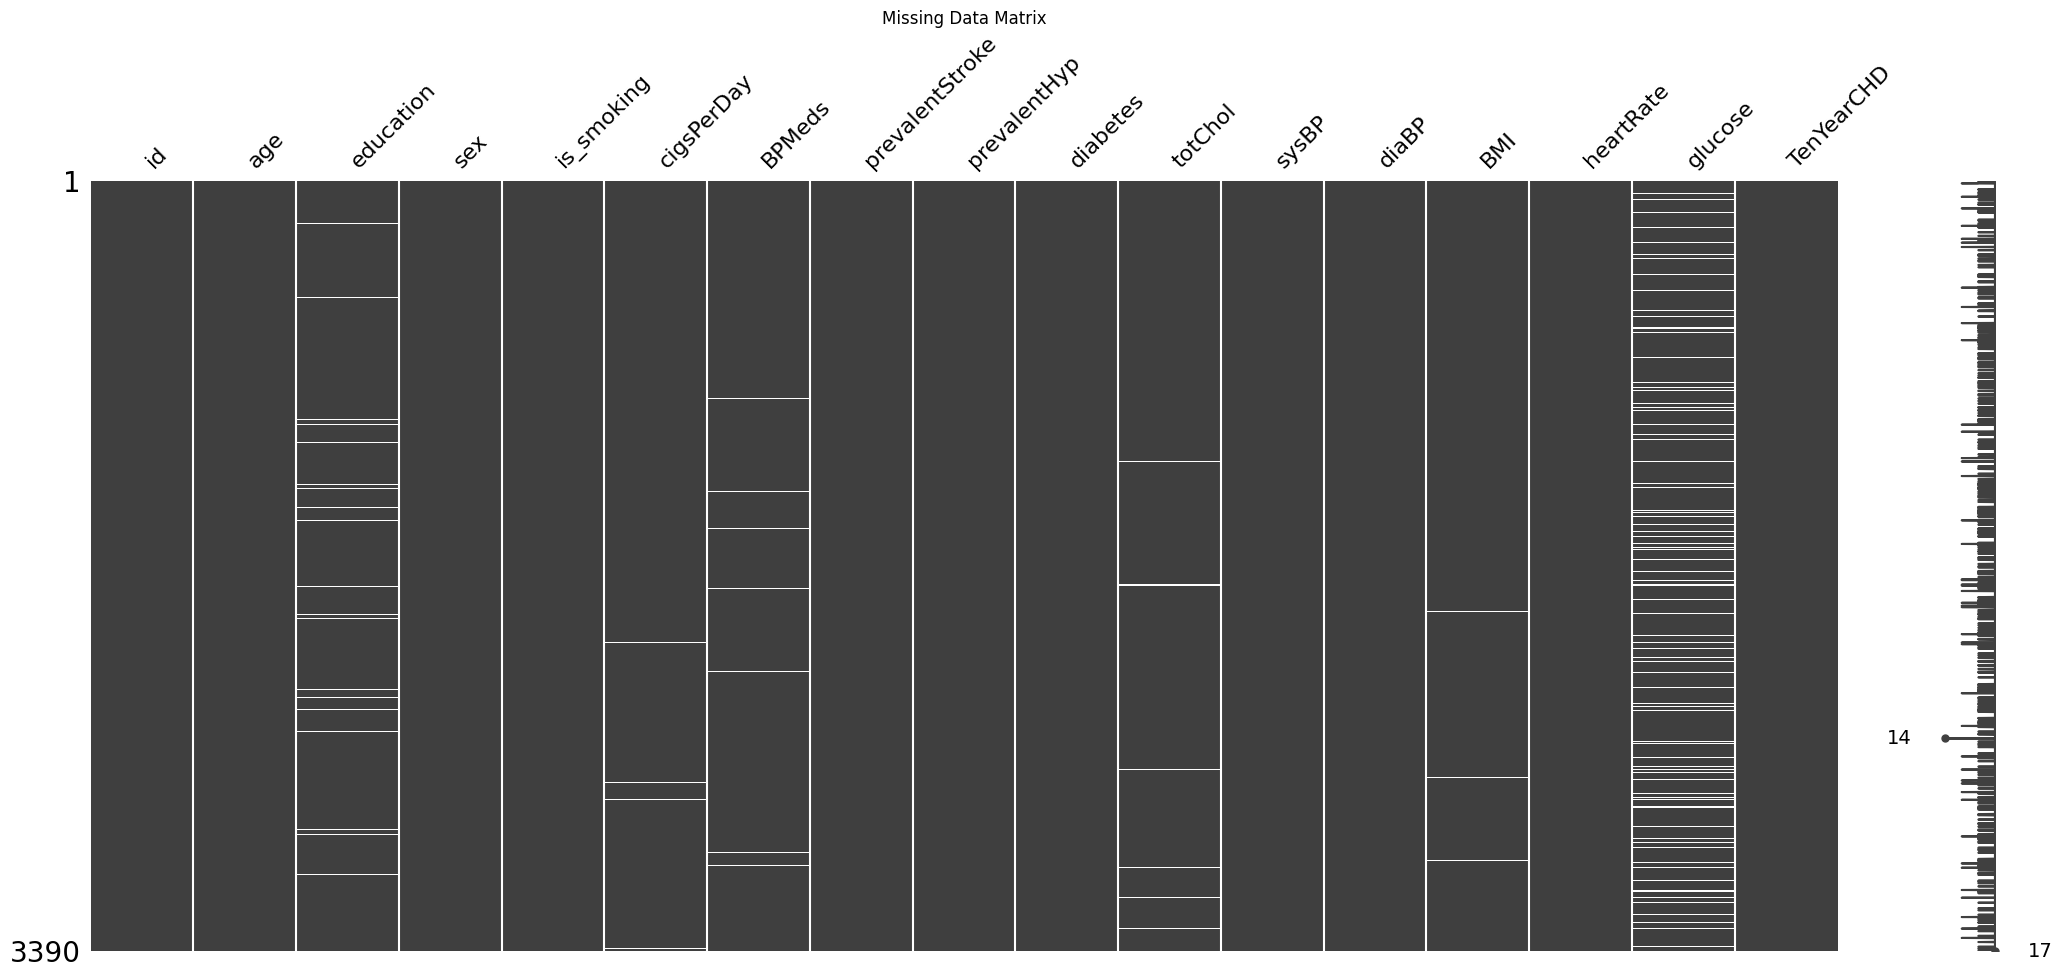

In [11]:
# Visualizing the missing values
# Create a missing data matrix visualization
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

### What did you know about your dataset?

There are several insights that can be gathered from the information provided about your dataset:

1. **Number of Entries:**
   - The dataset contains 3,390 entries.

2. **Columns and Data Types:**
   - There are 17 columns in the dataset.
   - The data types include integers (`int64`), floats (`float64`), and objects (`object`).

3. **Missing Values:**
   - Some columns have missing values (non-null counts are less than the total number of entries).
   - Columns with missing values include 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.

4. **Categorical Columns:**
   - 'sex' and 'is_smoking' are categorical columns represented as objects. You may want to check the unique values in these columns and potentially convert them to numerical values if needed.

5. **Numerical Columns:**
   - Columns such as 'age', 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose' are numerical.

6. **Target Variable:**
   - 'TenYearCHD' is the target variable for binary classification, indicating whether a patient is at risk of CHD in the next 10 years.

7. **Summary Statistics:**
   - Descriptive statistics such as mean, standard deviation, minimum, and maximum are not provided, but calculating these would be useful for understanding the distribution of numerical features.

8. **Potential Preprocessing Steps:**
   - Imputation: Consider imputing missing values for columns like 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.
   - Categorical Encoding: Convert categorical columns ('sex' and 'is_smoking') into numerical format, possibly using one-hot encoding or label encoding.
   - Feature Scaling: Depending on the algorithms you plan to use, consider scaling numerical features.

These initial insights provide a foundation for further exploration and preprocessing of the dataset. You can visualize the distribution of numerical features, explore relationships between variables, and handle missing values before building and training your machine learning model.

## ***2. Understanding Your Variables***

In [12]:
# Assuming data_raw is your DataFrame
columns_list = df.columns

# Print the list of columns
print("Dataset Columns:")
print(columns_list)

Dataset Columns:
Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [13]:
# Dataset Describe
df.describe(include="all").T

count unique  top  freq        mean         std    min  \
id               3390.0    NaN  NaN   NaN      1694.5  978.753033    0.0   
age              3390.0    NaN  NaN   NaN   49.542183    8.592878   32.0   
education        3303.0    NaN  NaN   NaN    1.970936    1.019081    1.0   
sex                3390      2    F  1923         NaN         NaN    NaN   
is_smoking         3390      2   NO  1703         NaN         NaN    NaN   
cigsPerDay       3368.0    NaN  NaN   NaN    9.069477   11.879078    0.0   
BPMeds           3346.0    NaN  NaN   NaN    0.029886    0.170299    0.0   
prevalentStroke  3390.0    NaN  NaN   NaN     0.00649    0.080309    0.0   
prevalentHyp     3390.0    NaN  NaN   NaN    0.315339    0.464719    0.0   
diabetes         3390.0    NaN  NaN   NaN    0.025664    0.158153    0.0   
totChol          3352.0    NaN  NaN   NaN  237.074284    45.24743  107.0   
sysBP            3390.0    NaN  NaN   NaN   132.60118    22.29203   83.5   
diaBP            3390.0    NaN  NaN   NaN   82.883038   12.023581   48.0   
BMI              3376.0    NaN  NaN   NaN   25.794964    4.115449  15.96   
heartRate        3389.0    NaN  NaN   NaN   75.977279   11.971868   45.0   
glucose          3086.0    NaN  NaN   NaN    82.08652   24.244753   40.0   
TenYearCHD       3390.0    NaN  NaN   NaN    0.150737    0.357846    0.0   

                    25%     50%      75%     max  
id               847.25  1694.5  2541.75  3389.0  
age                42.0    49.0     56.0    70.0  
education           1.0     2.0      3.0     4.0  
sex                 NaN     NaN      NaN     NaN  
is_smoking          NaN     NaN      NaN     NaN  
cigsPerDay          0.0     0.0     20.0    70.0  
BPMeds              0.0     0.0      0.0     1.0  
prevalentStroke     0.0     0.0      0.0     1.0  
prevalentHyp        0.0     0.0      1.0     1.0  
diabetes            0.0     0.0      0.0     1.0  
totChol           206.0   234.0    264.0   696.0  
sysBP             117.0   128.5    144.0   295.0  
diaBP              74.5    82.0     90.0   142.5  
BMI               23.02   25.38    28.04    56.8  
heartRate          68.0    75.0     83.0   143.0  
glucose            71.0    78.0     87.0   394.0  
TenYearCHD          0.0     0.0      0.0     1.0

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in column "{column}":')
    print(unique_values)
    print('\n')

Unique values in column "id":
[   0    1    2 ... 3387 3388 3389]


Unique values in column "age":
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]


Unique values in column "education":
[ 2.  4.  1.  3. nan]


Unique values in column "sex":
['F' 'M']


Unique values in column "is_smoking":
['YES' 'NO']


Unique values in column "cigsPerDay":
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]


Unique values in column "BPMeds":
[ 0. nan  1.]


Unique values in column "prevalentStroke":
[0 1]


Unique values in column "prevalentHyp":
[0 1]


Unique values in column "diabetes":
[0 1]


Unique values in column "totChol":
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Assuming data_raw is your DataFrame
columns_to_drop = ['id']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned DataFrame
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [16]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.6 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252697 sha256=ebc582959

In [17]:
from dataprep.eda import create_report
report = create_report(df)

DataPrep Report
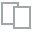
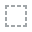
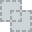
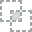
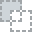
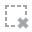
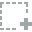
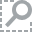
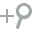
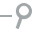
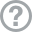
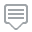
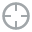
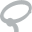
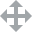
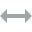
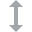
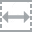
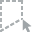
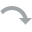
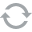
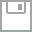
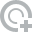
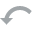
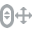
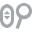
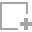
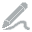
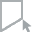
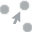
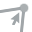
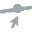

In [18]:
report

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


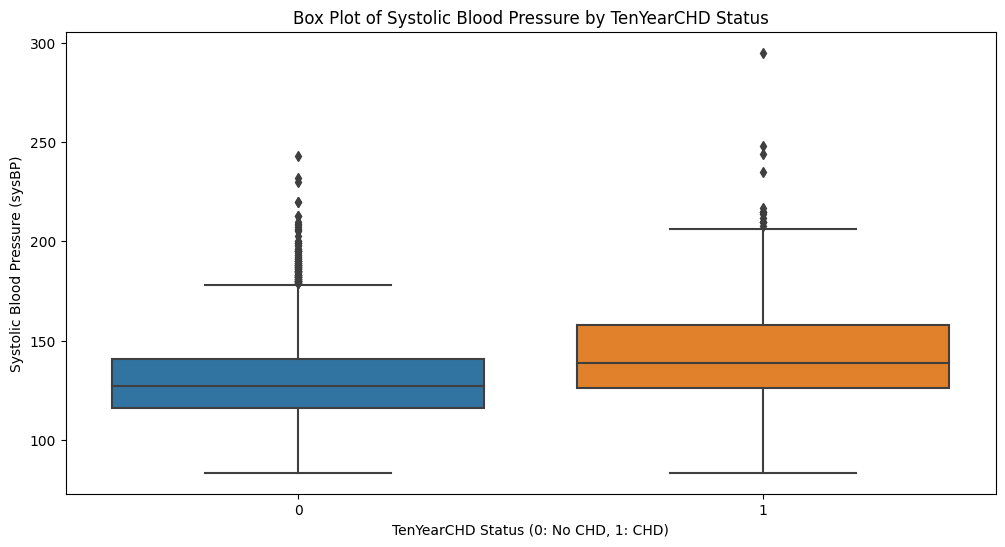

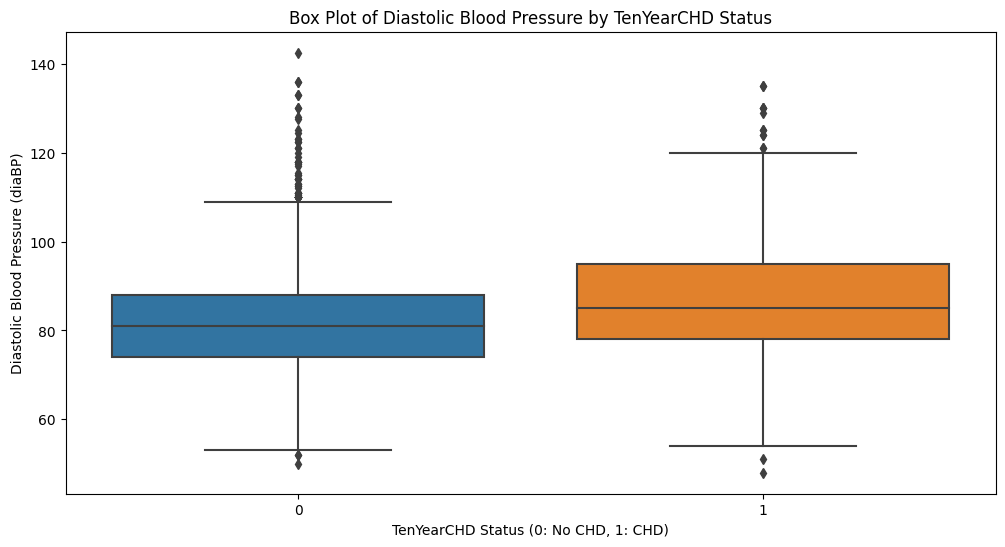

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Systolic Blood Pressure (sysBP)
plt.figure(figsize=(12, 6))
sns.boxplot(x='TenYearCHD', y='sysBP', data=df)
plt.title('Box Plot of Systolic Blood Pressure by TenYearCHD Status')
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)')
plt.ylabel('Systolic Blood Pressure (sysBP)')
plt.show()

# Box plot for Diastolic Blood Pressure (diaBP)
plt.figure(figsize=(12, 6))
sns.boxplot(x='TenYearCHD', y='diaBP', data=df)
plt.title('Box Plot of Diastolic Blood Pressure by TenYearCHD Status')
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)')
plt.ylabel('Diastolic Blood Pressure (diaBP)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

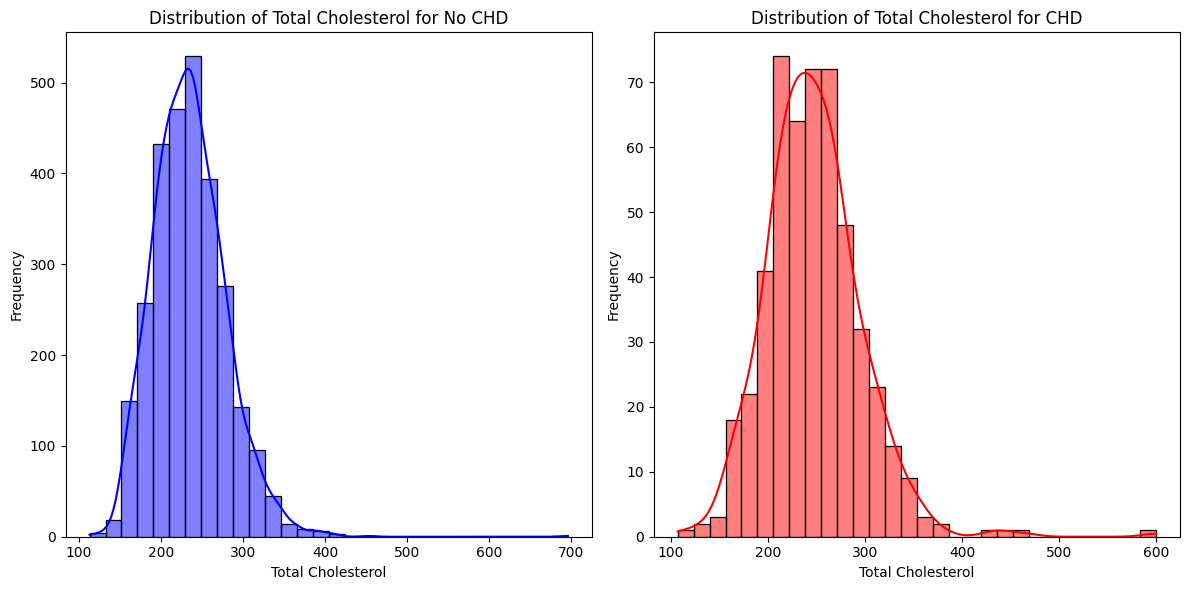

In [21]:
# Chart - 2 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['totChol'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Cholesterol for No CHD')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['totChol'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Cholesterol for CHD')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

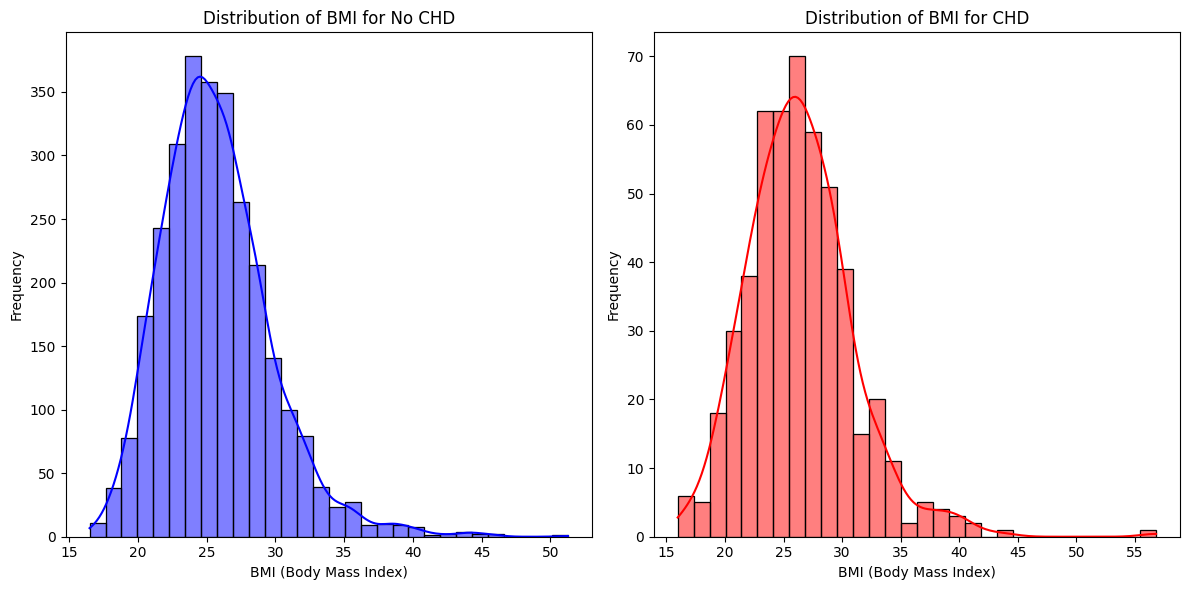

In [22]:
# Chart - 3 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['BMI'], bins=30, kde=True, color='blue')
plt.title('Distribution of BMI for No CHD')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['BMI'], bins=30, kde=True, color='red')
plt.title('Distribution of BMI for CHD')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

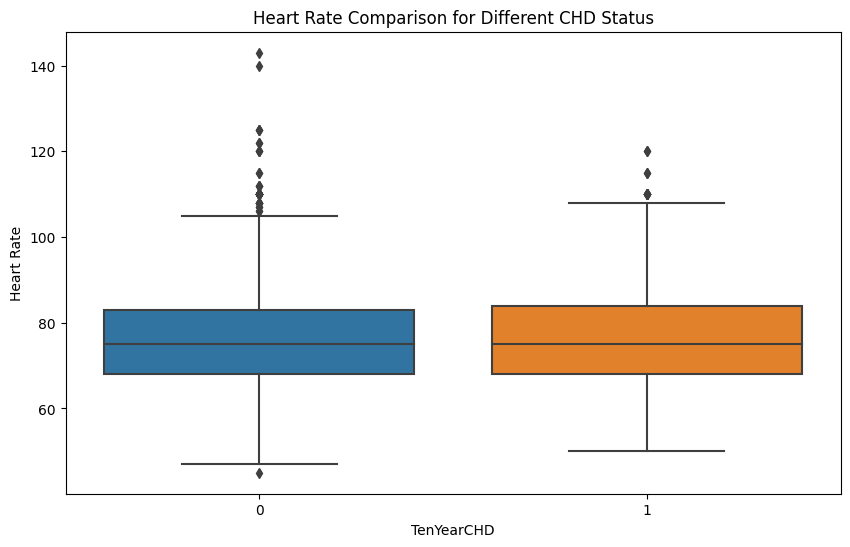

In [23]:
# Chart - 4 visualization code
# Set up the figure with subplots
plt.figure(figsize=(10, 6))

# Box plot for heart rates based on CHD status
sns.boxplot(x='TenYearCHD', y='heartRate', data=df)
plt.title('Heart Rate Comparison for Different CHD Status')
plt.xlabel('TenYearCHD')
plt.ylabel('Heart Rate')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

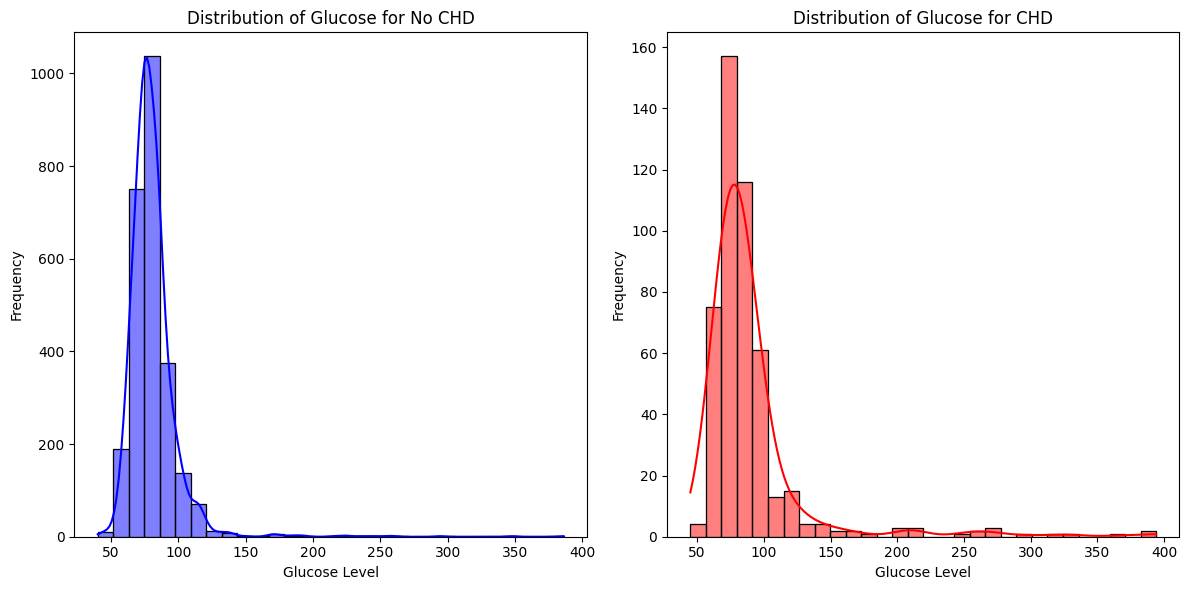

In [24]:
# Chart - 5 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['glucose'], bins=30, kde=True, color='blue')
plt.title('Distribution of Glucose for No CHD')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['glucose'], bins=30, kde=True, color='red')
plt.title('Distribution of Glucose for CHD')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


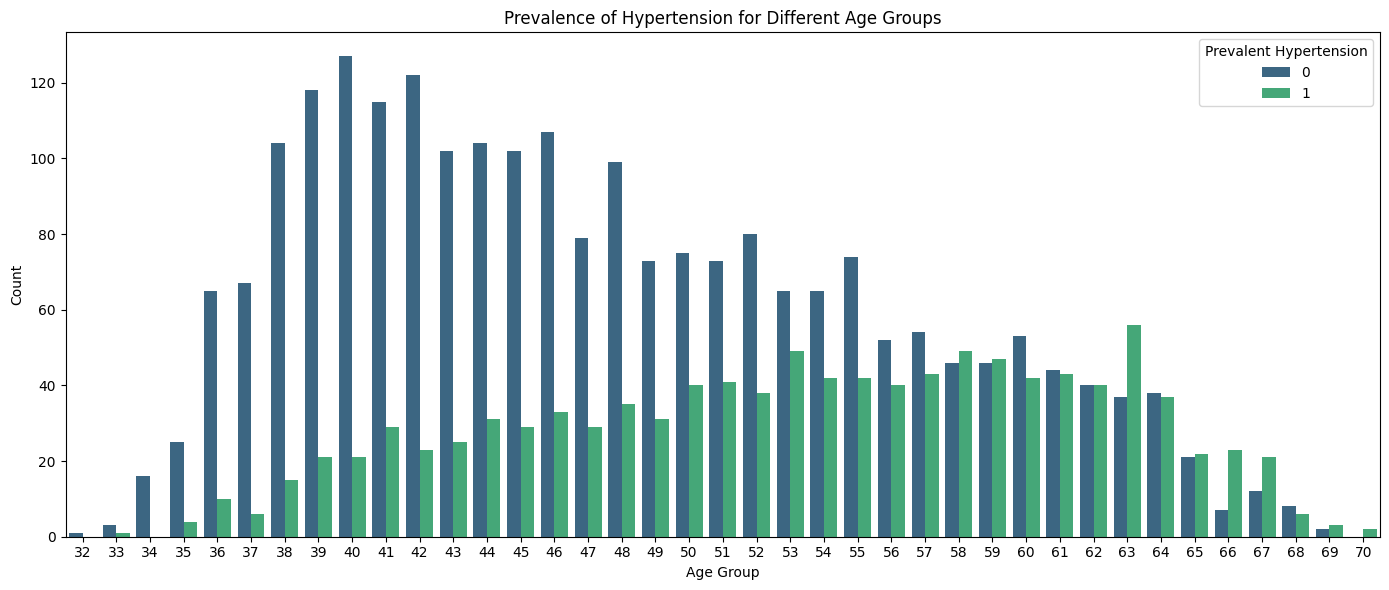

In [26]:
# Chart - 6 visualization code

# Set up the figure with subplots
plt.figure(figsize=(14, 6))

# Plot the prevalence of hypertension for different age groups
sns.countplot(x='age', hue='prevalentHyp', data=df, palette='viridis')
plt.title('Prevalence of Hypertension for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Prevalent Hypertension')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

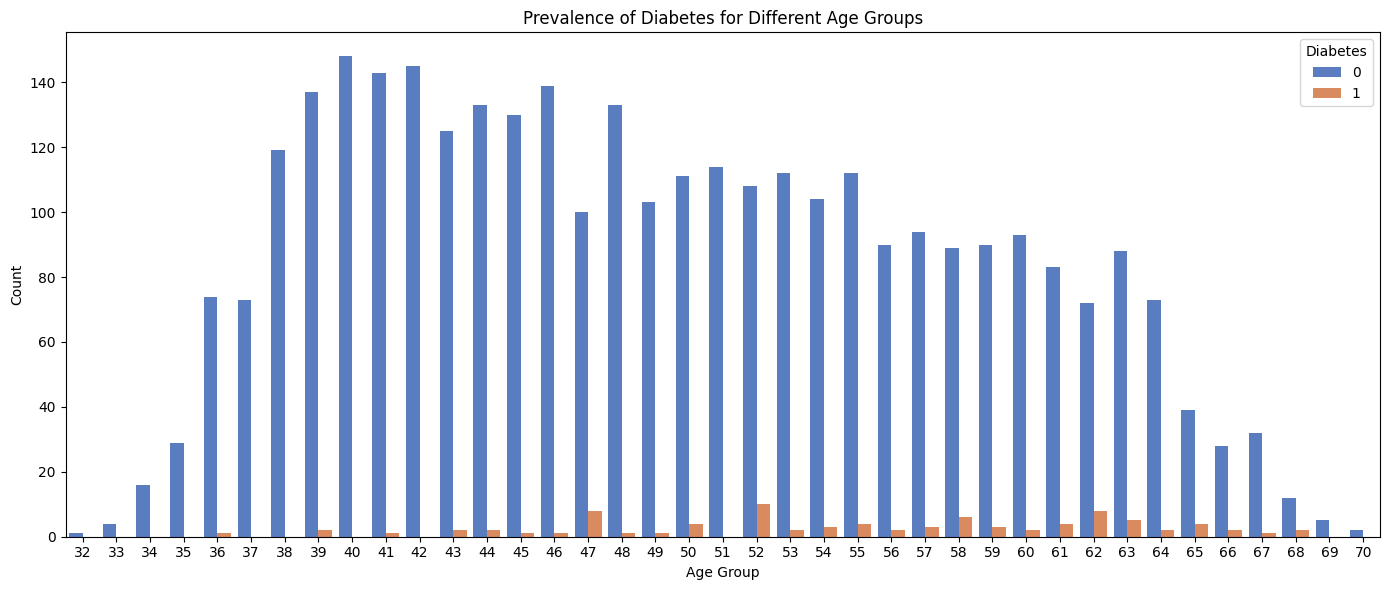

In [27]:
# Chart - 7 visualization code
# Set up the figure with subplots
plt.figure(figsize=(14, 6))
# Plot the prevalence of diabetes for different age groups
sns.countplot(x='age', hue='diabetes', data=df, palette='muted')
plt.title('Prevalence of Diabetes for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

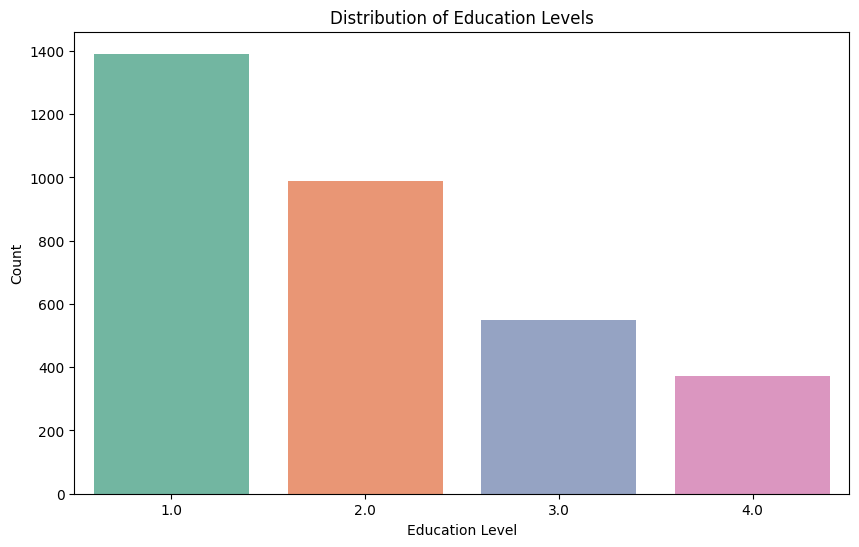

In [28]:
# Chart - 8 visualization code
# Plot the distribution of education levels
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, palette='Set2')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [29]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [30]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [31]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [32]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 - Distribution Plot

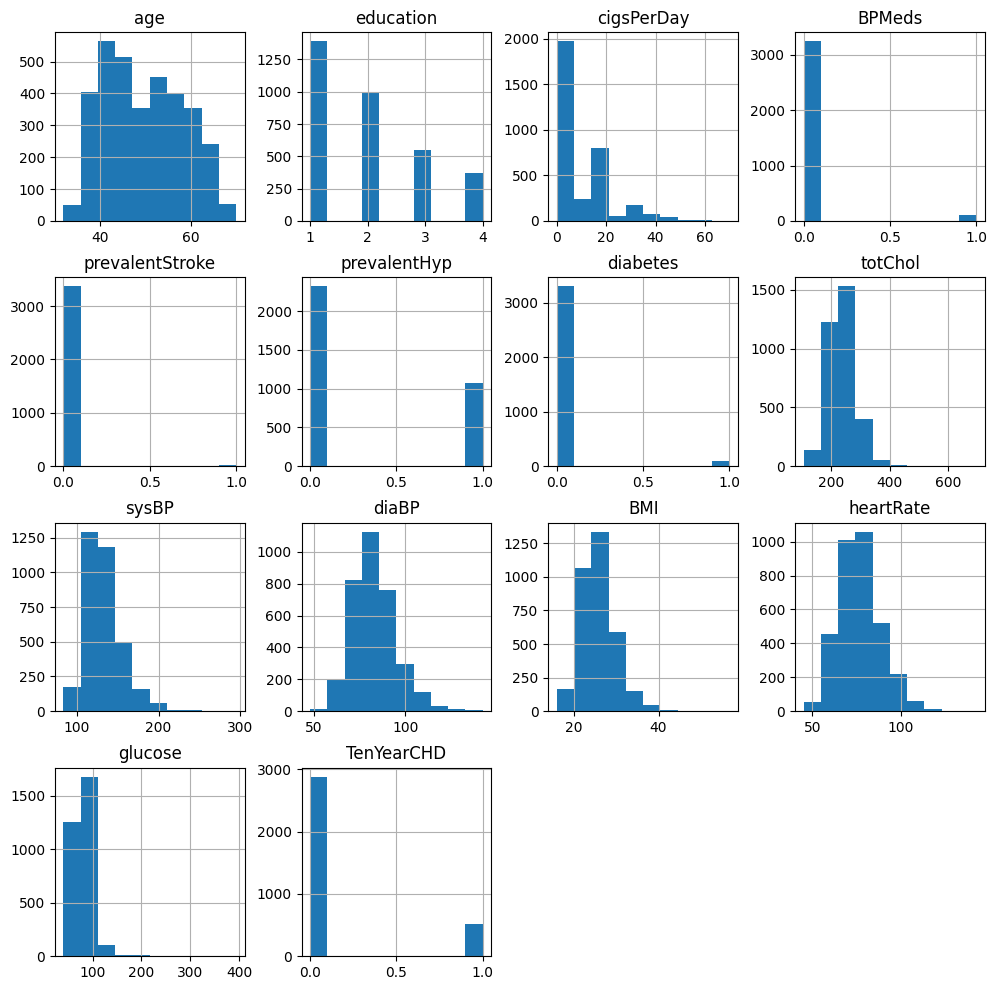

In [33]:
# Visualizing distributions using Histograms:
df.hist(figsize=(12, 12), grid=True);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

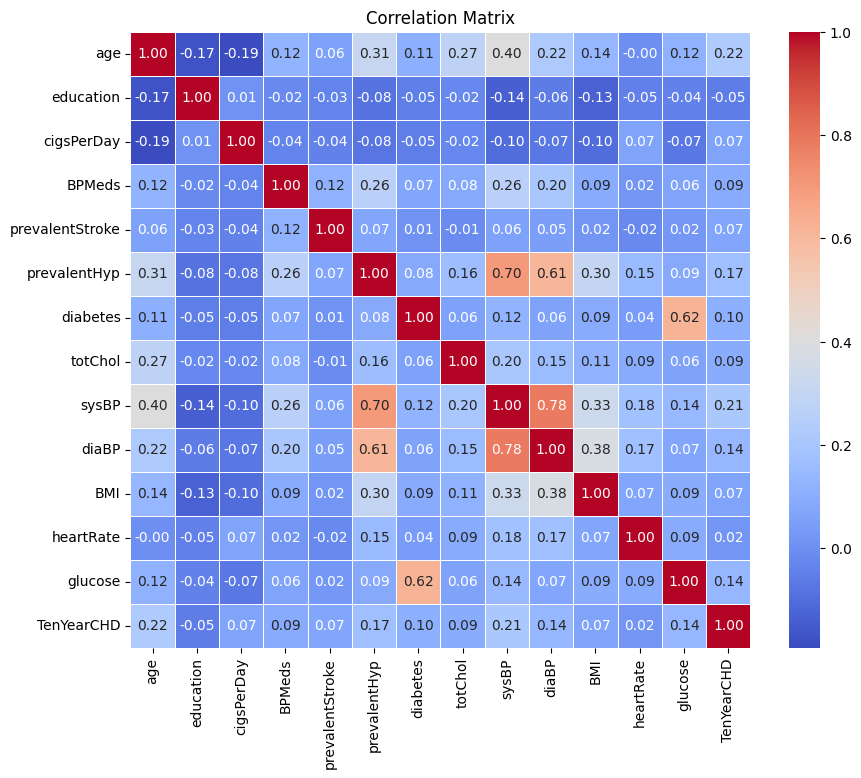

In [34]:
# Correlation Heatmap visualization code

# Calculate the correlation matrix
correlation_matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [35]:
# # Create a pair plot
# sns.pairplot(df)
# plt.show()

In [36]:
# Assuming data_raw is your DataFrame
columns_to_drop = ['education']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned DataFrame
df.head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64   F        YES         3.0     0.0                0             0   
1   36   M         NO         0.0     0.0                0             1   
2   46   F        YES        10.0     0.0                0             0   
3   50   M        YES        20.0     0.0                0             1   
4   64   F        YES        30.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0         0    221.0  148.0   85.0    NaN       90.0     80.0           1  
1         0    212.0  168.0   98.0  29.77       72.0     75.0           0  
2         0    250.0  116.0   71.0  20.35       88.0     94.0           0  
3         0    233.0  158.0   88.0  28.26       68.0     94.0           1  
4         0    241.0  136.5   85.0  26.42       70.0     77.0           0

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [40]:
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [41]:
df[df['cigsPerDay'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
422   55   F        YES         NaN     0.0                0             1   
466   45   M        YES         NaN     0.0                0             1   
469   42   M        YES         NaN     0.0                0             0   
491   61   F        YES         NaN     0.0                0             1   
538   41   F        YES         NaN     0.0                0             0   

     diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
422         0    213.0  163.0   91.0  28.66       69.0     66.0           0  
466         0    170.0  145.5   99.0  26.74       83.0     85.0           0  
469         0    196.0  123.0   73.0  22.06       66.0      NaN           0  
491         0    356.0  168.0   98.0  27.30      103.0    106.0           0  
538         0    171.0  135.0   82.5  24.35       79.0     82.0           0

In [42]:
df[df['BPMeds'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
8     41   F        YES        20.0     NaN                0             0   
102   68   F         NO         0.0     NaN                0             0   
128   67   F         NO         0.0     NaN                0             0   
174   60   F         NO         0.0     NaN                0             1   
194   56   F         NO         0.0     NaN                0             1   

     diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
8           0    220.0  126.0   78.0  20.70       86.0     79.0           0  
102         0    257.0  144.0   95.0  29.25       80.0     77.0           0  
128         0    261.0  117.0   63.0  22.55       75.0     83.0           0  
174         0    273.0  176.0   84.0  22.17       66.0     79.0           0  
194         0    391.0  126.0   84.0  24.83       80.0     78.0           0

In [43]:
df[df['totChol'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
10    61   F         NO         0.0     0.0                0             1   
69    65   M         NO         0.0     0.0                0             0   
254   52   F         NO         0.0     0.0                0             0   
290   37   F        YES        30.0     0.0                0             0   
554   38   F        YES         3.0     1.0                0             1   

     diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
10          0      NaN  185.0  121.0  35.22       80.0      NaN           0  
69          0      NaN  152.5   97.5  28.35       65.0     73.0           0  
254         0      NaN  129.0   83.0  32.57       65.0      NaN           0  
290         0      NaN  115.0   79.0  28.41       85.0      NaN           0  
554         0      NaN  125.0   80.0  22.79       98.0      NaN           0

In [44]:
df[df['BMI'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0      64   F        YES         3.0     0.0                0             0   
54     63   M        YES        20.0     0.0                1             1   
271    47   F         NO         0.0     0.0                0             0   
720    61   F         NO         0.0     0.0                0             1   
1057   64   M        YES        20.0     0.0                0             0   

      diabetes  totChol  sysBP  diaBP  BMI  heartRate  glucose  TenYearCHD  
0            0    221.0  148.0   85.0  NaN       90.0     80.0           1  
54           0    213.0  163.0   94.0  NaN       76.0     69.0           1  
271          0    195.0  126.0   75.0  NaN       60.0      NaN           1  
720          0    300.0  150.5   89.0  NaN       68.0     72.0           1  
1057         0    225.0  120.0   75.0  NaN       70.0     94.0           0

In [45]:
df[df['glucose'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
9    55   F         NO         0.0     0.0                0             1   
10   61   F         NO         0.0     0.0                0             1   
36   46   F         NO         0.0     0.0                0             0   
38   41   F        YES         9.0     1.0                1             1   
55   51   F         NO         0.0     0.0                0             1   

    diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
9          0    326.0  144.0   81.0  25.71       85.0      NaN           0  
10         0      NaN  185.0  121.0  35.22       80.0      NaN           0  
36         0    193.0  106.5   70.5  26.18       75.0      NaN           0  
38         0    180.0  114.0   70.0  22.41       92.0      NaN           0  
55         0    351.0  134.0   97.5  21.66      100.0      NaN           0

In [46]:
df[df['heartRate'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
1388   64   M        YES        18.0     0.0                0             1   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
1388         0    219.0  172.5   75.0  29.29        NaN     91.0           1

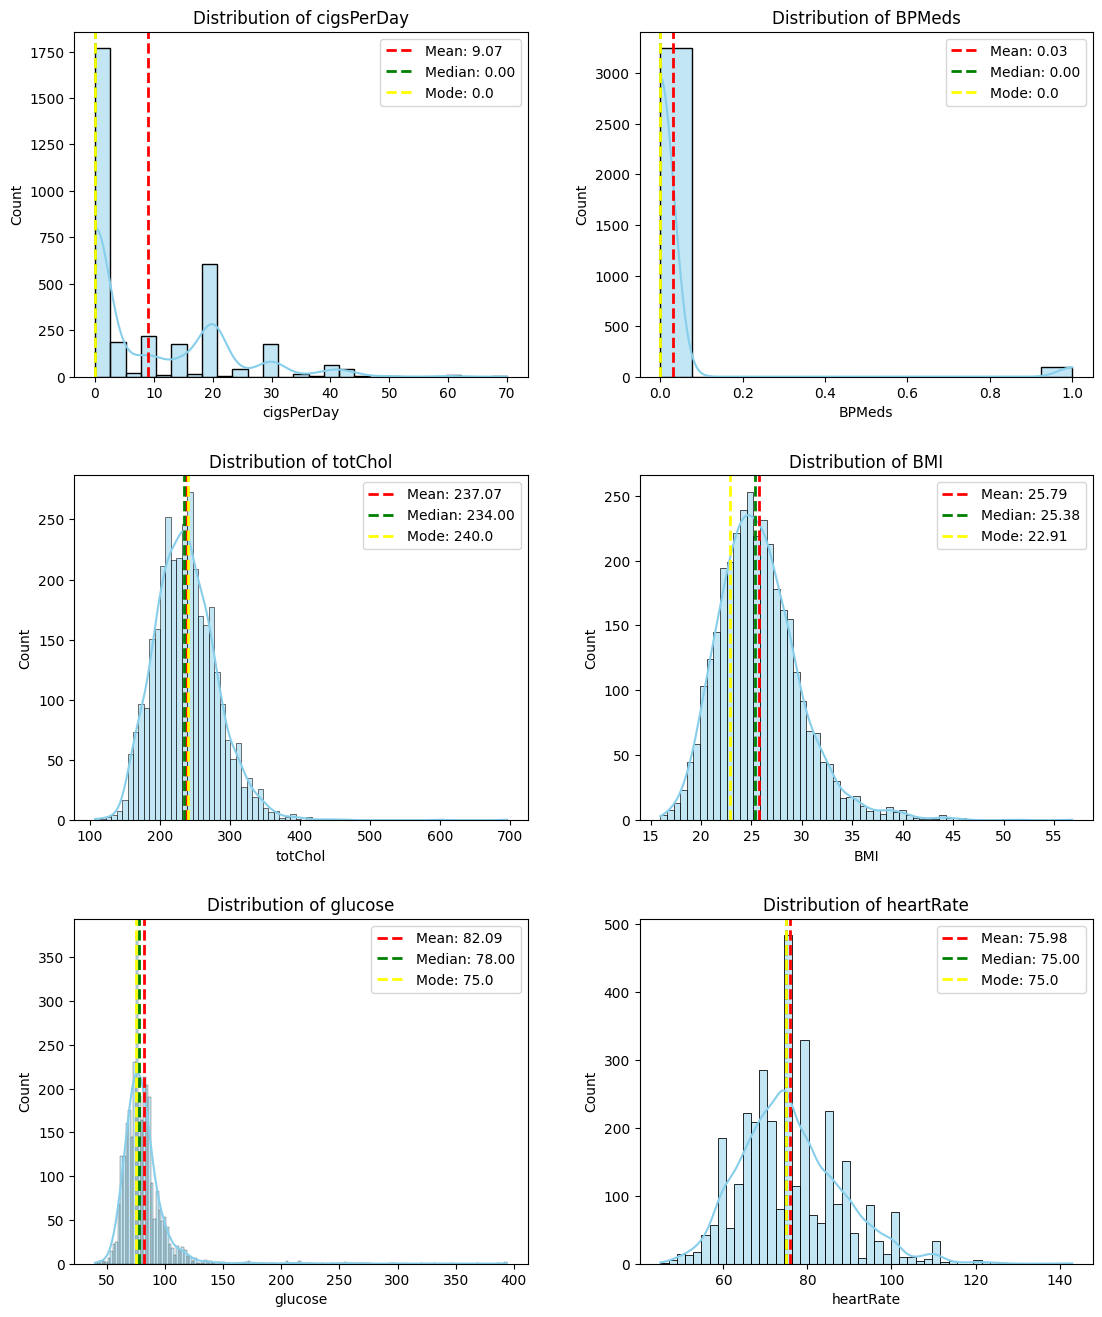

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_raw is your DataFrame

# List of columns to plot
columns_to_plot = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose', 'heartRate']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 14))
fig.tight_layout(pad=5.0)

for i, column in enumerate(columns_to_plot):
    # Plot distribution
    sns.histplot(data_raw[column], kde=True, ax=axes[i // 2, i % 2], color='skyblue')

    # Annotate with mean, median, mode
    mean_value = data_raw[column].mean()
    median_value = data_raw[column].median()
    mode_value = data_raw[column].mode().values[0]

    axes[i // 2, i % 2].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[i // 2, i % 2].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[i // 2, i % 2].axvline(mode_value, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value}')

    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')

plt.show()

In [48]:
# Calculate the mean of a specific column
column_mean = df['cigsPerDay'].mean()

print(f"Mean of 'cigsPerDay': {column_mean}")

# Replace the Nan values with Mean.
df['cigsPerDay'].fillna(column_mean, inplace=True)

Mean of 'cigsPerDay': 9.069477434679335


In [49]:
# Calculate the mean of a heartRate column
column_mean = df['heartRate'].mean()

print(f"Mean of 'heartRate': {column_mean}")

# Replace the Nan values with mean.
df['heartRate'].fillna(column_mean, inplace=True)

Mean of 'heartRate': 75.97727943346119


In [50]:
# Calculate the mean of a totChol column
column_median = df['totChol'].median()

print(f"Median of 'totChol': {column_median}")

# Replace the Nan values with Median.
df['totChol'].fillna(column_median, inplace=True)

Median of 'totChol': 234.0


In [51]:
# Calculate the mean of a BMI column
column_median = df['BMI'].median()

print(f"Median of 'BMI': {column_median}")

# Replace the Nan values with Median.
df['BMI'].fillna(column_median, inplace=True)

Median of 'BMI': 25.38


In [52]:
# Calculate the mean of a glucose column
column_median = df['glucose'].median()

print(f"Median of 'glucose': {column_median}")

# Replace the Nan values with Median.
df['glucose'].fillna(column_median, inplace=True)

Median of 'glucose': 78.0


In [53]:
# Calculate the mode of a BPMeds column
column_mode = df['BPMeds'].mode().values[0]

print(f"Mode of BPMeds: {column_mode}")

# Replace the Nan values with Mode.
df['BPMeds'].fillna(column_mode, inplace=True)

Mode of BPMeds: 0.0


In [54]:
df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 397.4+ KB


In [56]:
# Select the non desired columns from 'df'
non_desired_column = ['age','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

# Create a new DataFrame with the selected columns
data = df[non_desired_column]

data.head()

age sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0   64   F        YES     0.0                0             0         0   
1   36   M         NO     0.0                0             1         0   
2   46   F        YES     0.0                0             0         0   
3   50   M        YES     0.0                0             1         0   
4   64   F        YES     0.0                0             0         0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [57]:
# Select the desired columns from 'df'
desired_columns = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

# Create a new DataFrame with the selected columns
data_a = df[desired_columns]

data_a.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0

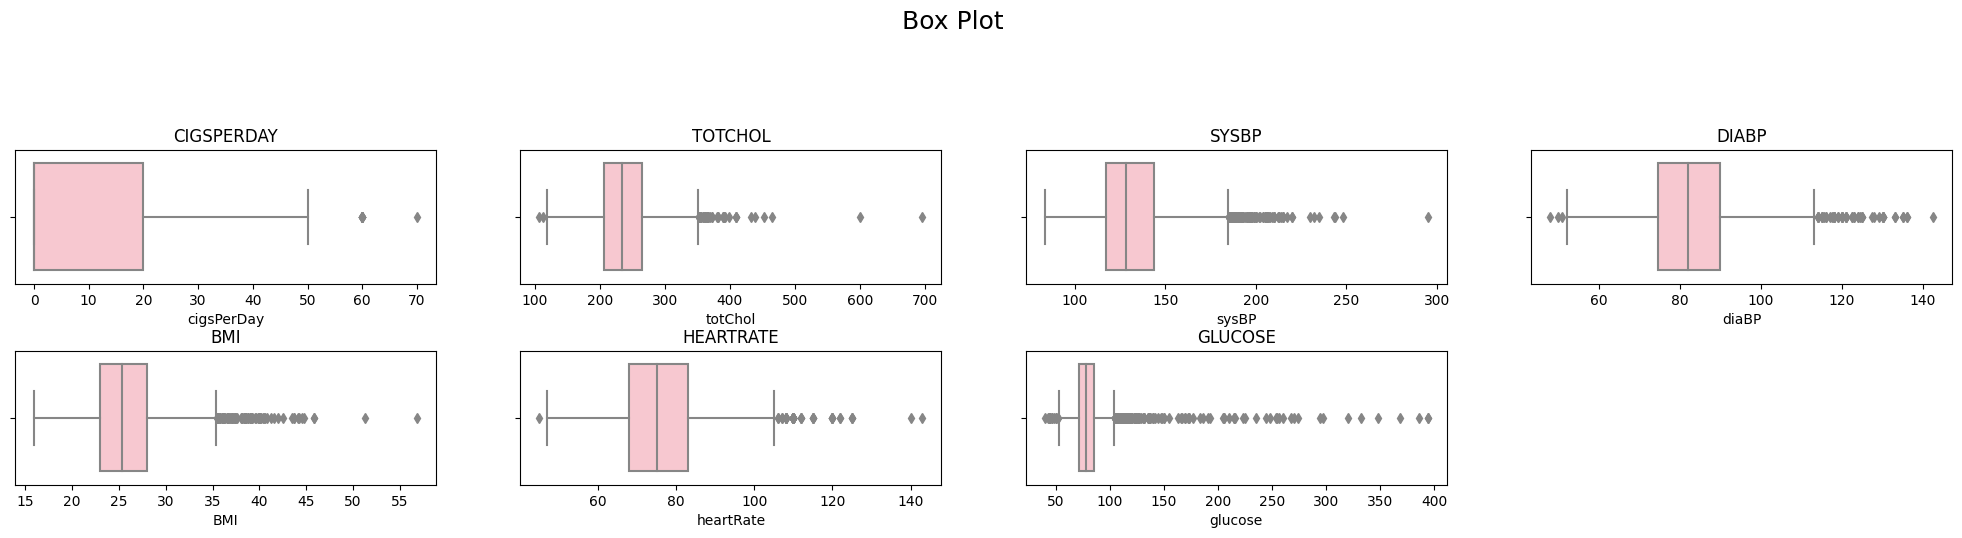

In [58]:
# Handling Outliers & Outlier treatments
df_2 = data_a.copy()

col_list = list(df_2.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [59]:
# Handling Outliers & Outlier treatments

def find_outliers_iqr(df_2):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    q1 = df_2.quantile(0.25)
    q3 = df_2.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column and count the number of outliers
    outliers_count = (df_2 < lower_bound) | (df_2 > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers

outliers_per_column = find_outliers_iqr(df_2)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))

Number of outliers per column:
glucose       214
sysBP         105
BMI            79
heartRate      64
diaBP          58
totChol        43
cigsPerDay      9
dtype: int64


In [60]:
# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df_2[ftr], 25)
  q_75 = np.percentile(df_2[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))

  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")

  # identify outliers
  outliers = [x for x in df_2[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))

  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]


    data_a[ftr] =  df_2.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

cigsPerDay 

Percentiles: 25th=0.000, 75th=20.000, IQR=20.000

lower = -30.0 and upper = 50.0 
 
Identified outliers: 9
cigsPerDay Outliers Removed

-------

totChol 

Percentiles: 25th=206.000, 75th=264.000, IQR=58.000

lower = 119.0 and upper = 351.0 
 
Identified outliers: 43
totChol Outliers Removed

-------

sysBP 

Percentiles: 25th=117.000, 75th=144.000, IQR=27.000

lower = 76.5 and upper = 184.5 
 
Identified outliers: 105
sysBP Outliers Removed

-------

diaBP 

Percentiles: 25th=74.500, 75th=90.000, IQR=15.500

lower = 51.25 and upper = 113.25 
 
Identified outliers: 58
diaBP Outliers Removed

-------

BMI 

Percentiles: 25th=23.030, 75th=27.997, IQR=4.967

lower = 15.578750000000005 and upper = 35.44875 
 
Identified outliers: 79
BMI Outliers Removed

-------

heartRate 

Percentiles: 25th=68.000, 75th=83.000, IQR=15.000

lower = 45.5 and upper = 105.5 
 
Identified outliers: 64
heartRate Outliers Removed

-------

glucose 

Percentiles: 25th=72.000, 75th=85.000, IQR=13.000


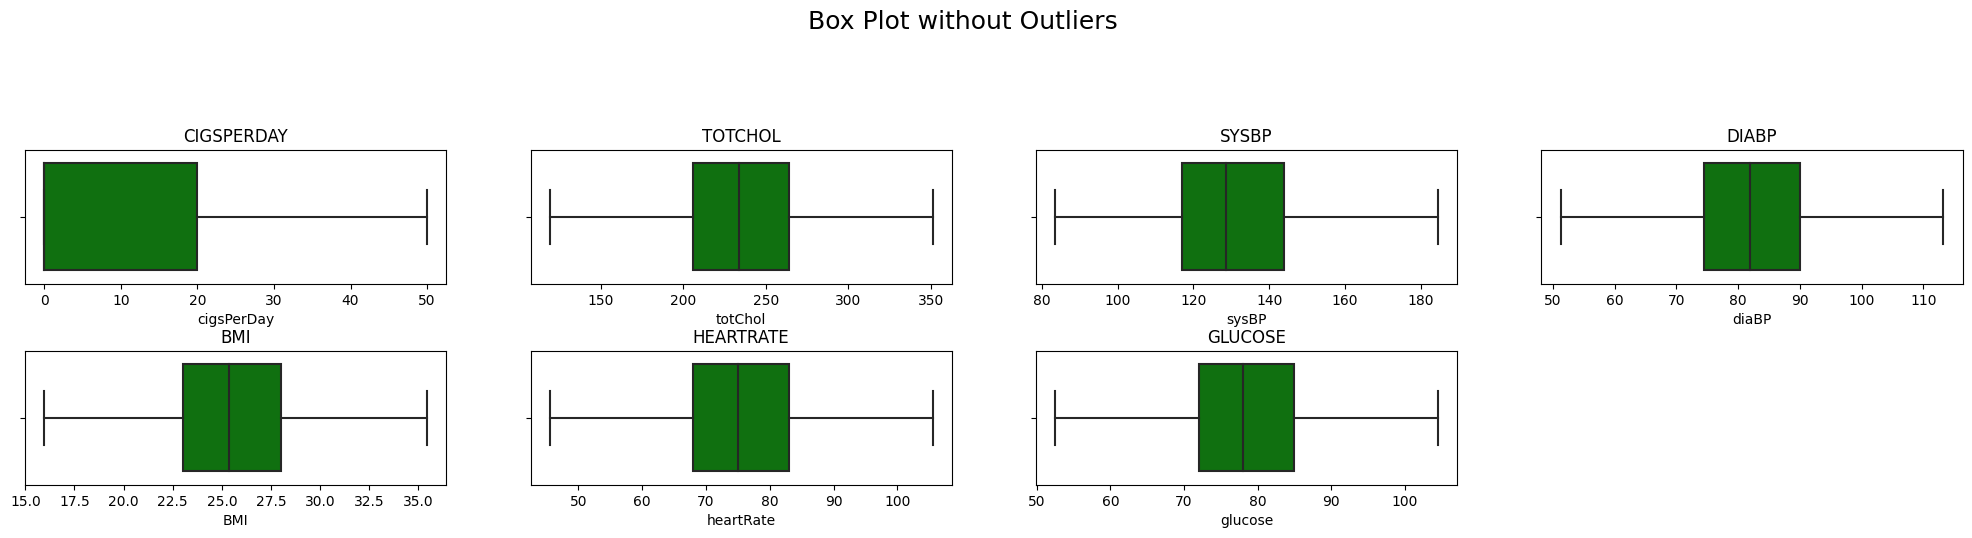

In [61]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=data_a[ticker],color='g' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [62]:
# Concatenate the two DataFrames vertically
df_new = pd.concat([data_a,data],axis=1)

In [63]:
data_a.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0

In [64]:
data.head()

age sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0   64   F        YES     0.0                0             0         0   
1   36   M         NO     0.0                0             1         0   
2   46   F        YES     0.0                0             0         0   
3   50   M        YES     0.0                0             1         0   
4   64   F        YES     0.0                0             0         0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [65]:
df_new.shape

(3390, 15)

In [66]:
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  age sex  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0   64   F   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0   36   M   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0   46   F   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0   50   M   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0   64   F   

  is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  
0        YES     0.0                0             0         0           1  
1         NO     0.0                0             1         0           0  
2        YES     0.0                0             0         0           0  
3        YES     0.0                0             1         0           1  
4        YES     0.0                0             0         0           0

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [67]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'rating' column to perform label encoding
df_new['sex_encoded'] = label_encoder.fit_transform(df_new['sex'])


df_new.drop('sex', axis=1, inplace=True)

In [68]:
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  age  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0   64   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0   36   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0   46   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0   50   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0   64   

  is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  \
0        YES     0.0                0             0         0           1   
1         NO     0.0                0             1         0           0   
2        YES     0.0                0             0         0           0   
3        YES     0.0                0             1         0           1   
4        YES     0.0                0             0         0           0   

   sex_encoded  
0            0  
1            1  
2            0  
3            1  
4            0

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [69]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [70]:
df_new['Hypertension'] = df_new.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  age  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0   64   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0   36   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0   46   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0   50   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0   64   

  is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  \
0        YES     0.0                0             0         0           1   
1         NO     0.0                0             1         0           0   
2        YES     0.0                0             0         0           0   
3        YES     0.0                0             1         0           1   
4        YES     0.0                0             0         0           0   

   sex_encoded  Hypertension  
0            0             2  
1            1             5  
2            0             1  
3            1             3  
4            0             2

In [71]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'

In [72]:
df_new['Diabetes'] = df_new['glucose'].apply(lambda x: diabetes_grade(x))
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  age  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0   64   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0   36   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0   46   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0   50   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0   64   

  is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  \
0        YES     0.0                0             0         0           1   
1         NO     0.0                0             1         0           0   
2        YES     0.0                0             0         0           0   
3        YES     0.0                0             1         0           1   
4        YES     0.0                0             0         0           0   

   sex_encoded  Hypertension  Diabetes  
0            0             2         1  
1            1             5         1  
2            0             1         1  
3            1             3         1  
4            0             2         1

In [73]:
# Calculating MAP using 'SysBP' and 'DiaBP'.
df_new["mean_art_pressure"] = (df_new["sysBP"] + 2 * df_new["diaBP"])/3

In [74]:
# remove not useful columns
df_new.drop(columns=['sysBP', 'diaBP', 'is_smoking'], inplace=True)

In [75]:
df_new.shape

(3390, 15)

#### 2. Feature Selection

In [76]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Assuming "transformed_data" is your DataFrame and "TenYearCHD" is the dependent variable
# Replace these names with your actual DataFrame and column names

# Assuming "transformed_data" is your DataFrame and "TenYearCHD" is the dependent variable
# Replace these names with your actual DataFrame and column names

# Assuming "transformed_data" is your DataFrame and "TenYearCHD" is the dependent variable
# Replace these names with your actual DataFrame and column names

# Split the data into features (X) and target variable (y)
X = df_new.drop("TenYearCHD", axis=1)
y = df_new["TenYearCHD"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=X_train.columns, columns=['importance'])

# Select features based on importance threshold
sfm = SelectFromModel(rf_classifier, threshold=0.01)  # Adjust the threshold as needed
sfm.fit(X_train, y_train)

# Transform the data to keep only important features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train a new Random Forest model on the selected features
rf_classifier_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = rf_classifier_selected.predict(X_test_selected)

# Evaluate the model performance
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy on Selected Features:", accuracy_selected)

# Print selected features
selected_features = X.columns[sfm.get_support()]
print("Selected Features:", selected_features)

Accuracy on Selected Features: 0.8584070796460177
Selected Features: Index(['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'age', 'BPMeds',
       'prevalentHyp', 'sex_encoded', 'Hypertension', 'mean_art_pressure'],
      dtype='object')


In [77]:
# Create a DataFrame with selected features and their importances
selected_features_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances.loc[selected_features, 'importance']
})

# Sort the DataFrame by importance in descending order
selected_features_df = selected_features_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print("Selected Features and Their Importances:")
print(selected_features_df)


Selected Features and Their Importances:
                             Feature  Importance
mean_art_pressure  mean_art_pressure    0.151432
BMI                              BMI    0.148348
age                              age    0.145428
totChol                      totChol    0.141154
glucose                      glucose    0.117742
heartRate                  heartRate    0.109912
cigsPerDay                cigsPerDay    0.066903
Hypertension            Hypertension    0.045706
sex_encoded              sex_encoded    0.022178
prevalentHyp            prevalentHyp    0.018065
BPMeds                        BPMeds    0.011209


In [78]:
# Create a DataFrame using selected features and fill the values with actual rows
df_selected_features = df_new[selected_features].copy()

# Add the target variable column ("TenYearCHD") to the new DataFrame
df_selected_features["TenYearCHD"] = df_new["TenYearCHD"]

# Display the new DataFrame with selected features and target variable
print("DataFrame with Selected Features:")
df_selected_features.head()

DataFrame with Selected Features:


cigsPerDay  totChol    BMI  heartRate  glucose  age  BPMeds  prevalentHyp  \
0         3.0    221.0  25.38       90.0     80.0   64     0.0             0   
1         0.0    212.0  29.77       72.0     75.0   36     0.0             1   
2        10.0    250.0  20.35       88.0     94.0   46     0.0             0   
3        20.0    233.0  28.26       68.0     94.0   50     0.0             1   
4        30.0    241.0  26.42       70.0     77.0   64     0.0             0   

   sex_encoded  Hypertension  mean_art_pressure  TenYearCHD  
0            0             2         106.000000           1  
1            1             5         121.333333           0  
2            0             1          86.000000           0  
3            1             3         111.333333           1  
4            0             2         102.166667           0

In [79]:
df_selected_features.shape

(3390, 12)

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [80]:
# Manipulate Features to minimize feature correlation and create new features
#examining the skewness in the dataset to check the distribution
skewness = df_selected_features.skew()

#ginding the absolute value
abs(skewness)

# setting up the threshold
skewness_threshold = 0.5

# Separate features into symmetrical and skewed based on skewness threshold
symmetrical_features = skewness[abs(skewness) < skewness_threshold].index
skewed_features = skewness[abs(skewness) >= skewness_threshold].index

# Create new DataFrames for symmetrical and skewed features
print('FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :')
symmetrical_data = df_new[symmetrical_features]
print(symmetrical_features)

print('FEATURES FOLLOWED SKEWED DISTRIBUTION :')
skewed_data = df_new[skewed_features]
print(skewed_features)

FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :
Index(['totChol', 'BMI', 'heartRate', 'glucose', 'age', 'sex_encoded'], dtype='object')
FEATURES FOLLOWED SKEWED DISTRIBUTION :
Index(['cigsPerDay', 'BPMeds', 'prevalentHyp', 'Hypertension',
       'mean_art_pressure', 'TenYearCHD'],
      dtype='object')


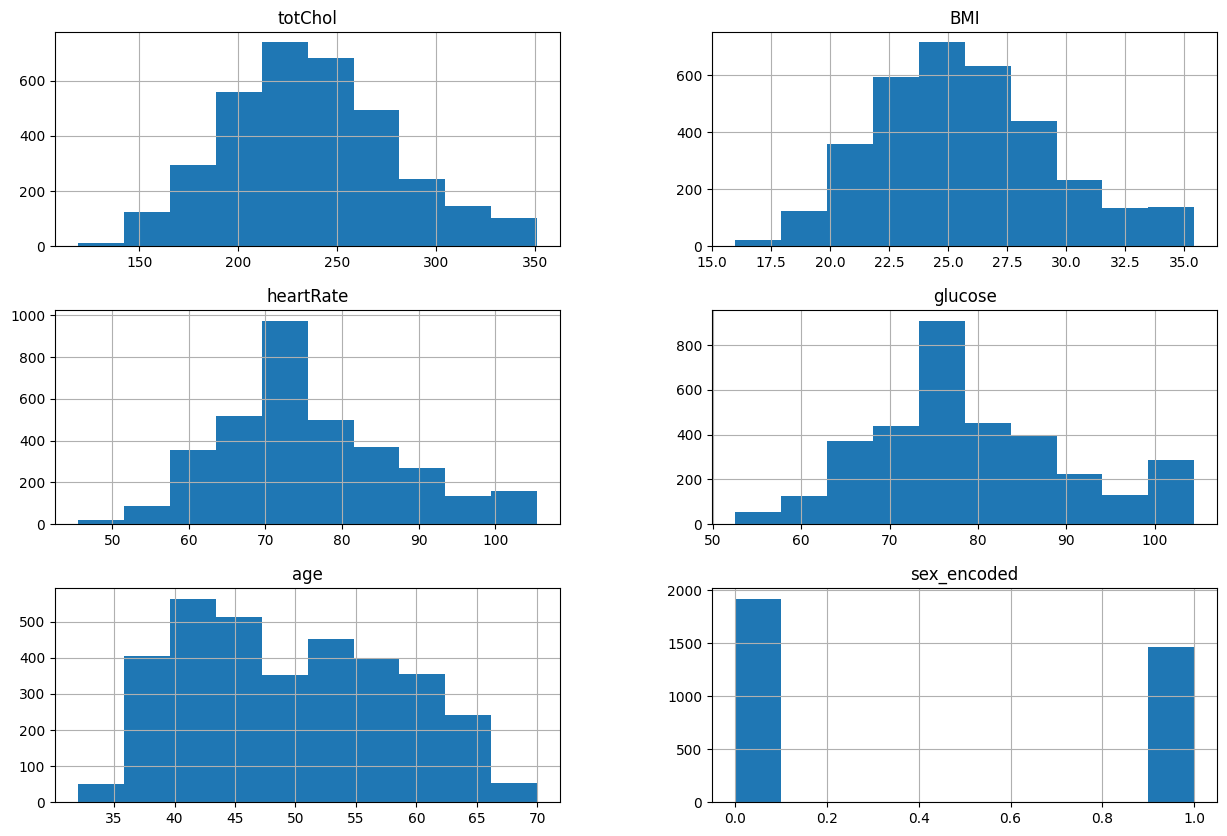

In [81]:
# Visualizing distributions using Histograms:
symmetrical_data.hist(figsize=(15, 10), grid=True);

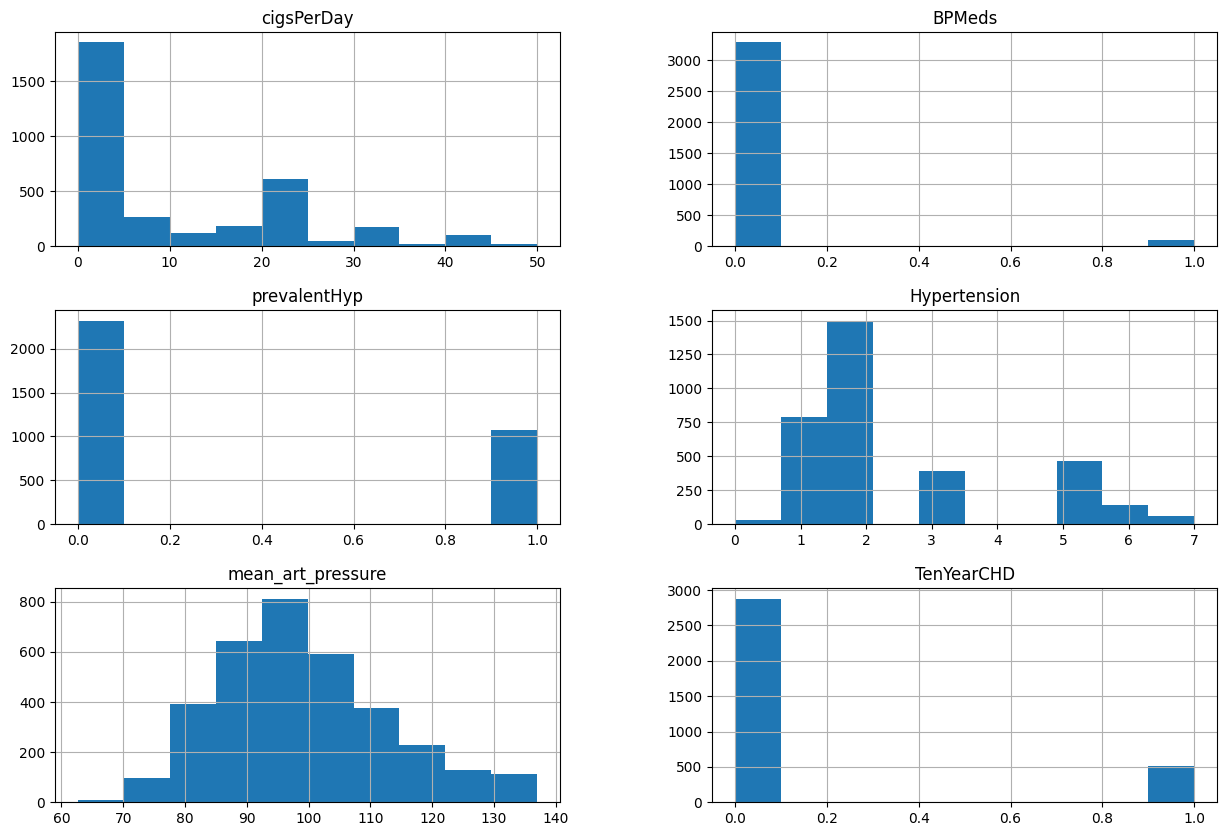

In [82]:
# Visualizing distributions using Histograms:
skewed_data.hist(figsize=(15, 10), grid=True);

In [83]:
skewed_data.columns

Index(['cigsPerDay', 'BPMeds', 'prevalentHyp', 'Hypertension',
       'mean_art_pressure', 'TenYearCHD'],
      dtype='object')

In [84]:
import pandas as pd

# Assuming 'skewed_data' is your DataFrame
unique_value_counts = skewed_data.nunique()

# Print or view the unique value counts for each column
print(unique_value_counts)

cigsPerDay            31
BPMeds                 2
prevalentHyp           2
Hypertension           7
mean_art_pressure    376
TenYearCHD             2
dtype: int64


In [85]:
# Select the columns you want to transform
columns_to_transform = ['cigsPerDay','mean_art_pressure' ]

# Apply log transformation to the selected columns
skewed_data[columns_to_transform] = skewed_data[columns_to_transform].apply(lambda x: np.log1p(x))

# Display the transformed DataFrame
skewed_data.head()

cigsPerDay  BPMeds  prevalentHyp  Hypertension  mean_art_pressure  \
0    1.386294     0.0             0             2           4.672829   
1    0.000000     0.0             1             5           4.806750   
2    2.397895     0.0             0             1           4.465908   
3    3.044522     0.0             1             3           4.721471   
4    3.433987     0.0             0             2           4.636346   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [86]:
symmetrical_data.head()

totChol    BMI  heartRate  glucose  age  sex_encoded
0    221.0  25.38       90.0     80.0   64            0
1    212.0  29.77       72.0     75.0   36            1
2    250.0  20.35       88.0     94.0   46            0
3    233.0  28.26       68.0     94.0   50            1
4    241.0  26.42       70.0     77.0   64            0

In [87]:
# Concatenate horizontally (along columns)
tranformed_data = pd.concat([symmetrical_data, skewed_data], axis=1)

In [88]:
tranformed_data.head()

totChol    BMI  heartRate  glucose  age  sex_encoded  cigsPerDay  BPMeds  \
0    221.0  25.38       90.0     80.0   64            0    1.386294     0.0   
1    212.0  29.77       72.0     75.0   36            1    0.000000     0.0   
2    250.0  20.35       88.0     94.0   46            0    2.397895     0.0   
3    233.0  28.26       68.0     94.0   50            1    3.044522     0.0   
4    241.0  26.42       70.0     77.0   64            0    3.433987     0.0   

   prevalentHyp  Hypertension  mean_art_pressure  TenYearCHD  
0             0             2           4.672829           1  
1             1             5           4.806750           0  
2             0             1           4.465908           0  
3             1             3           4.721471           1  
4             0             2           4.636346           0

In [89]:
tranformed_data.isna().sum()

totChol              0
BMI                  0
heartRate            0
glucose              0
age                  0
sex_encoded          0
cigsPerDay           0
BPMeds               0
prevalentHyp         0
Hypertension         0
mean_art_pressure    0
TenYearCHD           0
dtype: int64

In [90]:
tranformed_data.shape

(3390, 12)

### 6. Data Scaling

In [91]:
from sklearn.preprocessing import StandardScaler

# Assuming "transformed_data" is your DataFrame
# Replace this name with your actual DataFrame name

# Separate the features (X) from the target variable
X = tranformed_data.drop("TenYearCHD", axis=1)
y = tranformed_data["TenYearCHD"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features using the scaler
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target variable column ("TenYearCHD") to the scaled DataFrame
df_scaled["TenYearCHD"] = y

# Display the new DataFrame with scaled features and target variable
print("DataFrame with Scaled Features:")
df_scaled.head()


DataFrame with Scaled Features:


totChol       BMI  heartRate   glucose       age  sex_encoded  cigsPerDay  \
0 -0.362779 -0.085301   1.226791  0.044207  1.682783    -0.873425    0.010286   
1 -0.572897  1.066765  -0.332766 -0.389669 -1.576210     1.144919   -0.936032   
2  0.314268 -1.405321   1.053506  1.259059 -0.412284    -0.873425    0.700829   
3 -0.082622  0.670496  -0.679334  1.259059  0.053287     1.144919    1.142232   
4  0.104150  0.187626  -0.506050 -0.216119  1.682783    -0.873425    1.408091   

     BPMeds  prevalentHyp  Hypertension  mean_art_pressure  TenYearCHD  
0 -0.174342     -0.678658     -0.340212           0.555352           1  
1 -0.174342      1.473495      1.574540           1.547952           0  
2 -0.174342     -0.678658     -0.978463          -0.978313           0  
3 -0.174342      1.473495      0.298039           0.915878           1  
4 -0.174342     -0.678658     -0.340212           0.284945           0

In [92]:
# Drop all rows with NaN values in place
df_scaled.dropna(inplace=True)

In [93]:
df_scaled.isna().sum()

totChol              0
BMI                  0
heartRate            0
glucose              0
age                  0
sex_encoded          0
cigsPerDay           0
BPMeds               0
prevalentHyp         0
Hypertension         0
mean_art_pressure    0
TenYearCHD           0
dtype: int64

In [94]:
df_scaled.shape

(3390, 12)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [95]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df_scaled.drop("TenYearCHD", axis=1)
y = df_scaled['TenYearCHD']

In [96]:
#splitting the data into 80/20 ration
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

In [97]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2712, 11) (678, 11) (2712,) (678,)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [98]:
# Install the imbalanced-learn library
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [99]:
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert the resampled data back to DataFrames
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled_df = pd.Series(y_train_resampled, name=y_train.name)

# Now, X_train_resampled_df and y_train_resampled_df contain the resampled data
# You can use these DataFrames for training your machine learning models

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

# ***7. ML Model Implementation***

## BASIC MODELS

### Model 1 - Logistic Regression

Accuracy (Logistic Regression): 0.6799410029498525

Confusion Matrix (Logistic Regression):
 [[400 181]
 [ 36  61]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.92      0.69      0.79       581
           1       0.25      0.63      0.36        97

    accuracy                           0.68       678
   macro avg       0.58      0.66      0.57       678
weighted avg       0.82      0.68      0.73       678



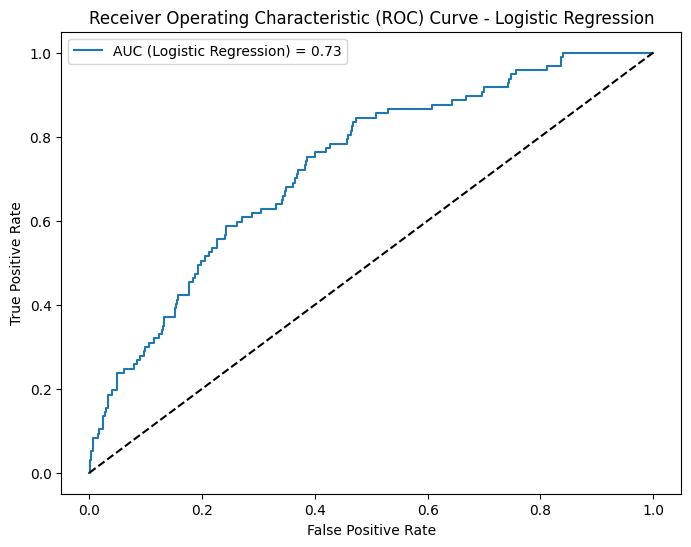

AUC Score (Logistic Regression): 0.7306457050588214


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the resampled training data
logreg_model.fit(X_train_resampled_df, y_train_resampled_df)

# Make predictions on the original test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

# Print evaluation metrics
print("Accuracy (Logistic Regression):", accuracy_logreg)
print("\nConfusion Matrix (Logistic Regression):\n", conf_matrix_logreg)
print("\nClassification Report (Logistic Regression):\n", class_report_logreg)

# Predict probabilities for the positive class
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'AUC (Logistic Regression) = {roc_auc_logreg:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend()
plt.show()

# Print AUC score
print("AUC Score (Logistic Regression):", roc_auc_logreg)

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}

Accuracy (Best Logistic Regression): 0.6799410029498525

Confusion Matrix (Best Logistic Regression):
 [[400 181]
 [ 36  61]]

Classification Report (Best Logistic Regression):
               precision    recall  f1-score   support

           0       0.92      0.69      0.79       581
           1       0.25      0.63      0.36        97

    accuracy                           0.68       678
   macro avg       0.58      0.66      0.57       678
weighted avg       0.82      0.68      0.73       678



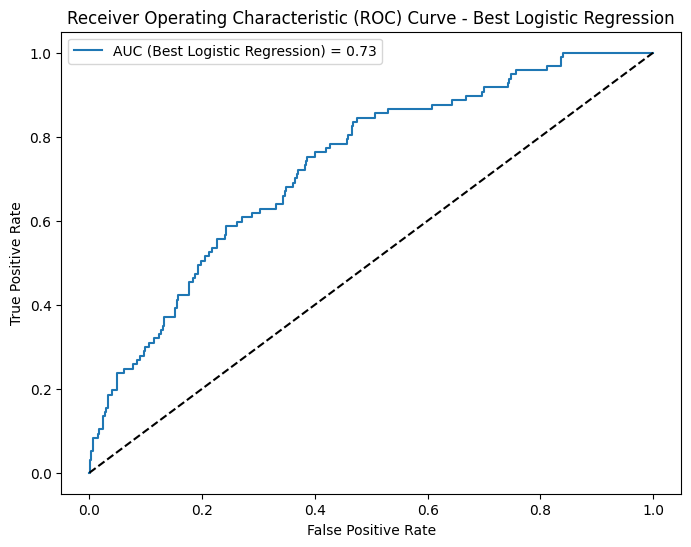

AUC-ROC Score (Best Logistic Regression): 0.7306457050588214


In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
}

# Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(logreg_model, param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the resampled training data
grid_search.fit(X_train_resampled_df, y_train_resampled_df)

# Get the best model from GridSearchCV
best_logreg_model = grid_search.best_estimator_

# Make predictions on the original test set
y_pred_best_logreg = best_logreg_model.predict(X_test)

# Evaluate the best Logistic Regression model
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
conf_matrix_best_logreg = confusion_matrix(y_test, y_pred_best_logreg)
class_report_best_logreg = classification_report(y_test, y_pred_best_logreg)

# Print evaluation metrics for the best Logistic Regression model
print("Best Hyperparameters:", grid_search.best_params_)
print("\nAccuracy (Best Logistic Regression):", accuracy_best_logreg)
print("\nConfusion Matrix (Best Logistic Regression):\n", conf_matrix_best_logreg)
print("\nClassification Report (Best Logistic Regression):\n", class_report_best_logreg)

# Predict probabilities for the positive class
y_prob_best_logreg = best_logreg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_best_logreg, tpr_best_logreg, thresholds_best_logreg = roc_curve(y_test, y_prob_best_logreg)
roc_auc_best_logreg = roc_auc_score(y_test, y_prob_best_logreg)

# Plot the ROC curve for the best Logistic Regression model
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_logreg, tpr_best_logreg, label=f'AUC (Best Logistic Regression) = {roc_auc_best_logreg:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Logistic Regression')
plt.legend()
plt.show()

# Print AUC-ROC score for the best Logistic Regression model
print("AUC-ROC Score (Best Logistic Regression):", roc_auc_best_logreg)

### Model 2 - Decision Tree

Accuracy (Decision Tree): 0.7389380530973452

Confusion Matrix (Decision Tree):
 [[470 111]
 [ 66  31]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       581
           1       0.22      0.32      0.26        97

    accuracy                           0.74       678
   macro avg       0.55      0.56      0.55       678
weighted avg       0.78      0.74      0.76       678



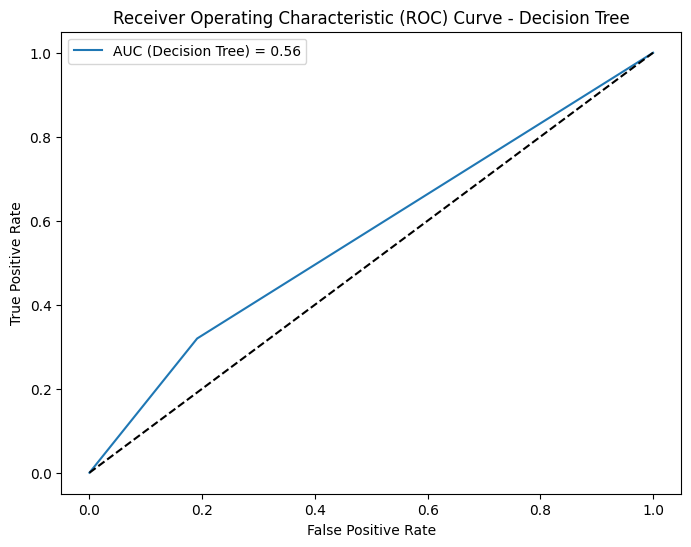

AUC-ROC Score (Decision Tree): 0.5642688574622496


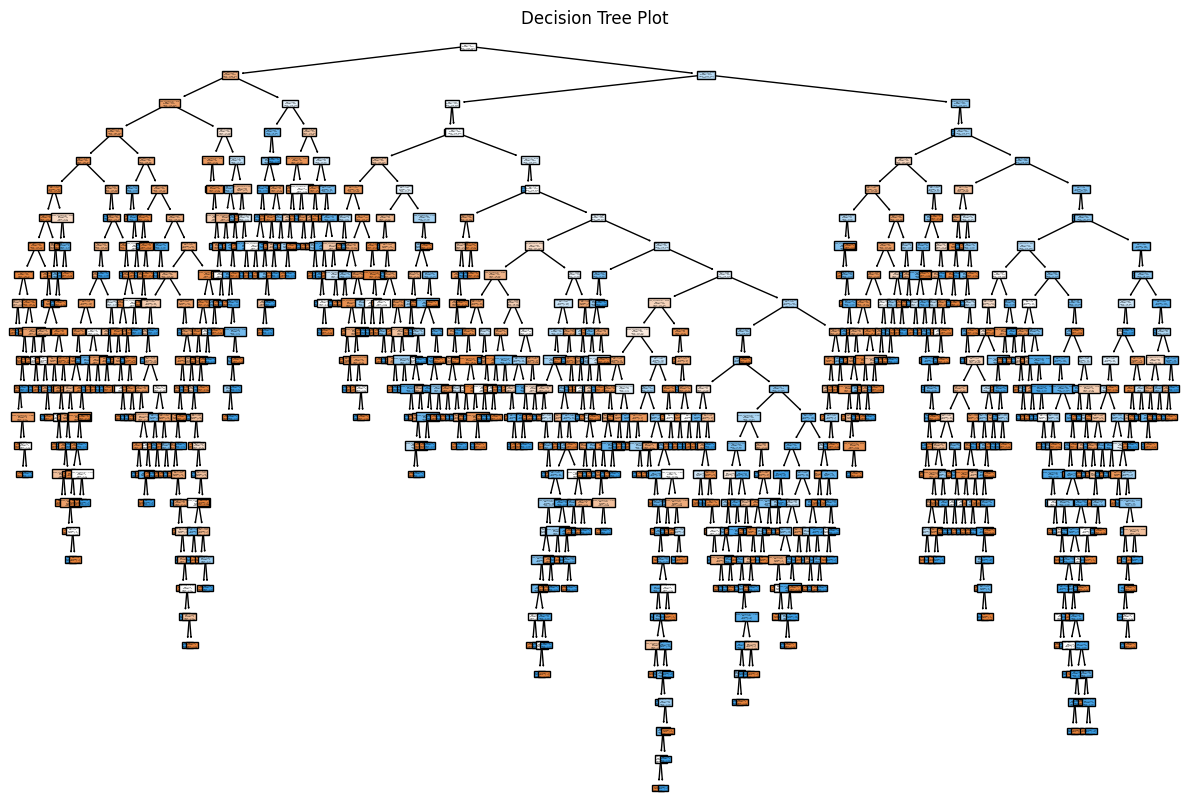

In [102]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the resampled training data
dt_model.fit(X_train_resampled_df, y_train_resampled_df)

# Make predictions on the original test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Print evaluation metrics for the Decision Tree model
print("Accuracy (Decision Tree):", accuracy_dt)
print("\nConfusion Matrix (Decision Tree):\n", conf_matrix_dt)
print("\nClassification Report (Decision Tree):\n", class_report_dt)

# Predict probabilities for the positive class
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plot the ROC curve for the Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend()
plt.show()

# Print AUC-ROC score for the Decision Tree model
print("AUC-ROC Score (Decision Tree):", roc_auc_dt)

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X_train_resampled_df.columns, class_names=["No CHD", "CHD"])
plt.title("Decision Tree Plot")
plt.show()

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Accuracy (Best Decision Tree): 0.7433628318584071

Confusion Matrix (Best Decision Tree):
 [[478 103]
 [ 71  26]]

Classification Report (Best Decision Tree):
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       581
           1       0.20      0.27      0.23        97

    accuracy                           0.74       678
   macro avg       0.54      0.55      0.54       678
weighted avg       0.77      0.74      0.76       678



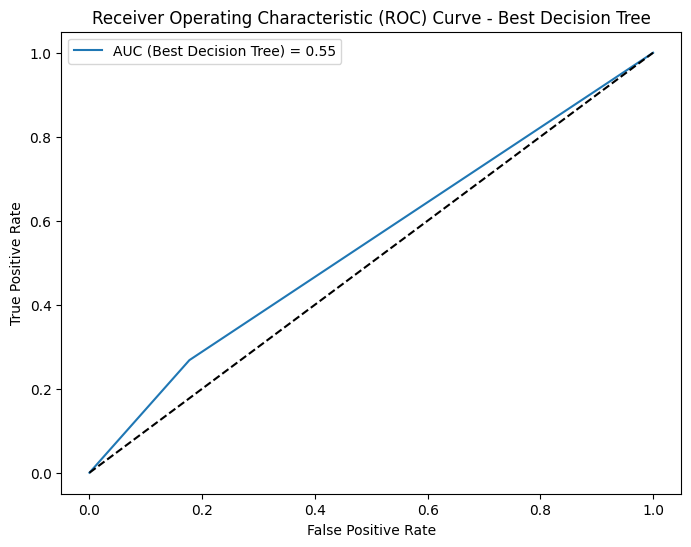

AUC-ROC Score (Best Decision Tree): 0.5453803431694377


In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the resampled training data
grid_search.fit(X_train_resampled_df, y_train_resampled_df)

# Get the best model from GridSearchCV
best_dt_model = grid_search.best_estimator_

# Make predictions on the original test set
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate the best Decision Tree model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
conf_matrix_best_dt = confusion_matrix(y_test, y_pred_best_dt)
class_report_best_dt = classification_report(y_test, y_pred_best_dt)

# Print evaluation metrics for the best Decision Tree model
print("Best Hyperparameters:", grid_search.best_params_)
print("\nAccuracy (Best Decision Tree):", accuracy_best_dt)
print("\nConfusion Matrix (Best Decision Tree):\n", conf_matrix_best_dt)
print("\nClassification Report (Best Decision Tree):\n", class_report_best_dt)

# Predict probabilities for the positive class
y_prob_best_dt = best_dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_best_dt, tpr_best_dt, thresholds_best_dt = roc_curve(y_test, y_prob_best_dt)
roc_auc_best_dt = roc_auc_score(y_test, y_prob_best_dt)

# Plot the ROC curve for the best Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_dt, tpr_best_dt, label=f'AUC (Best Decision Tree) = {roc_auc_best_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Decision Tree')
plt.legend()
plt.show()

# Print AUC-ROC score for the best Decision Tree model
print("AUC-ROC Score (Best Decision Tree):", roc_auc_best_dt)

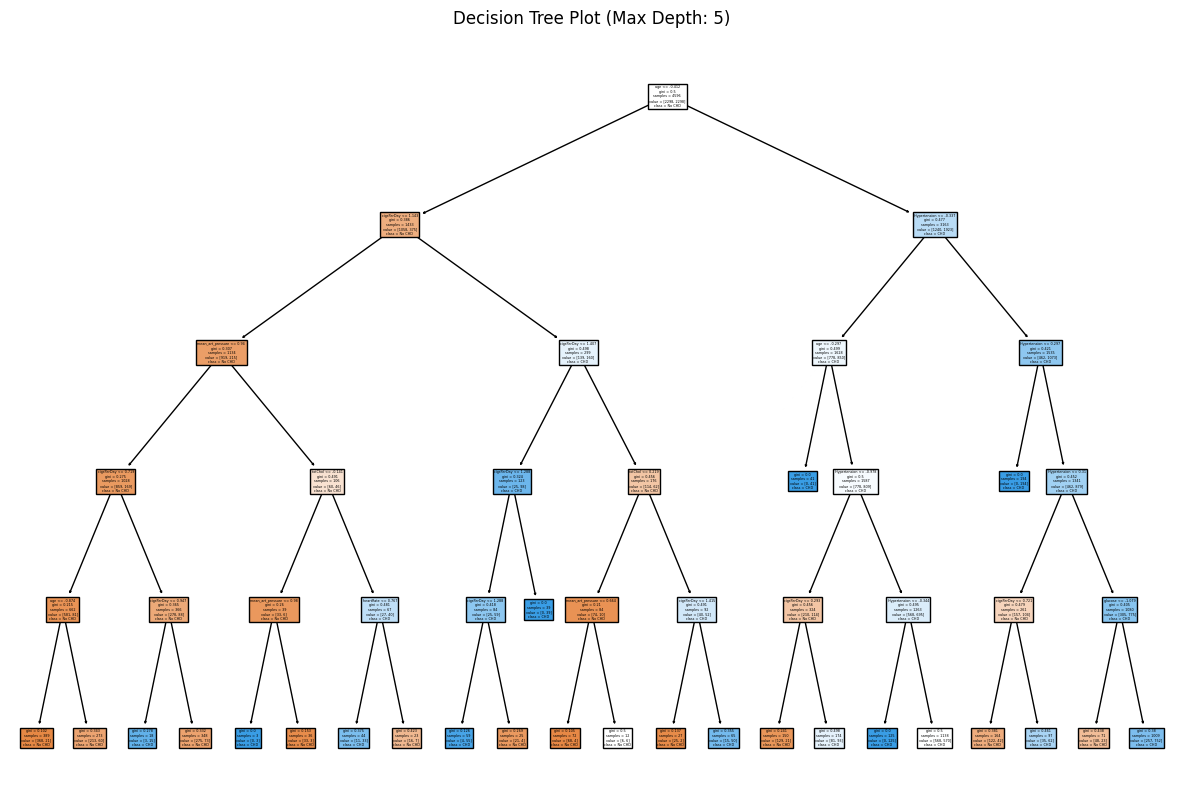

In [104]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a Decision Tree model with a maximum depth of 5
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model on the resampled training data
dt_model.fit(X_train_resampled_df, y_train_resampled_df)

# Plot the Decision Tree with a maximum depth of 5
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X_train_resampled_df.columns, class_names=["No CHD", "CHD"])
plt.title("Decision Tree Plot (Max Depth: 5)")
plt.show()

### Model 3 - Random forest Classifier

Accuracy (Random Forest): 0.799410029498525

Confusion Matrix (Random Forest):
 [[521  60]
 [ 76  21]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       581
           1       0.26      0.22      0.24        97

    accuracy                           0.80       678
   macro avg       0.57      0.56      0.56       678
weighted avg       0.78      0.80      0.79       678



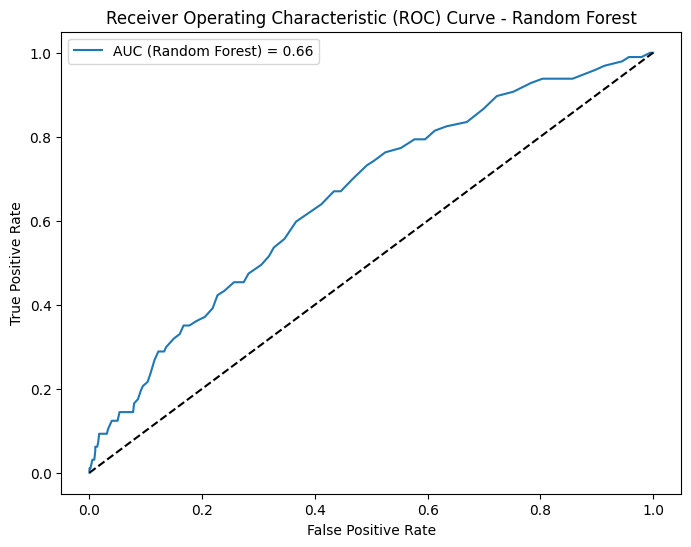

AUC-ROC Score (Random Forest): 0.6557925368632113


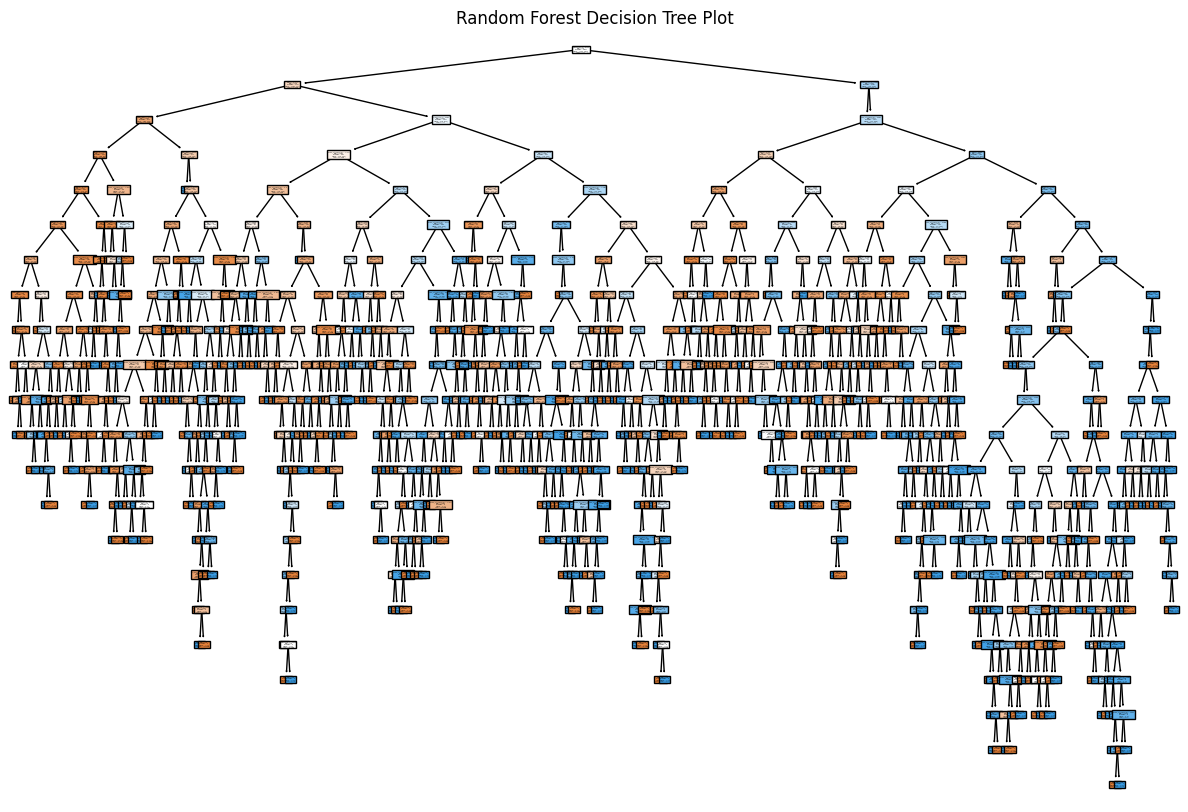

In [105]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled training data
rf_model.fit(X_train_resampled_df, y_train_resampled_df)

# Make predictions on the original test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print evaluation metrics for the Random Forest model
print("Accuracy (Random Forest):", accuracy_rf)
print("\nConfusion Matrix (Random Forest):\n", conf_matrix_rf)
print("\nClassification Report (Random Forest):\n", class_report_rf)

# Predict probabilities for the positive class
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot the ROC curve for the Random Forest model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forest) = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend()
plt.show()

# Print AUC-ROC score for the Random Forest model
print("AUC-ROC Score (Random Forest):", roc_auc_rf)

# Plot one of the decision trees from the Random Forest
# For simplicity, let's plot the first decision tree in the forest
plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X_train_resampled_df.columns, class_names=["No CHD", "CHD"])
plt.title("Random Forest Decision Tree Plot")
plt.show()

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(rf_model, param_grid, scoring='precision', cv=StratifiedKFold(n_splits=5), verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the resampled training data
grid_search.fit(X_train_resampled_df, y_train_resampled_df)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the original test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best Random Forest model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
class_report_best_rf = classification_report(y_test, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

# Print evaluation metrics for the best Random Forest model
print("Best Hyperparameters:", grid_search.best_params_)
print("\nAccuracy (Best Random Forest):", accuracy_best_rf)
print("\nClassification Report (Best Random Forest):\n", class_report_best_rf)
print("AUC-ROC Score (Best Random Forest):", roc_auc_best_rf)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy (Best Random Forest): 0.7979351032448377

Classification Report (Best Random Forest):
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       581
           1       0.27      0.24      0.25        97

    accuracy                           0.80       678
   macro avg       0.57      0.56      0.57       678
weighted avg       0.79      0.80      0.79       678

AUC-ROC Score (Best Random Forest): 0.6623844420391432


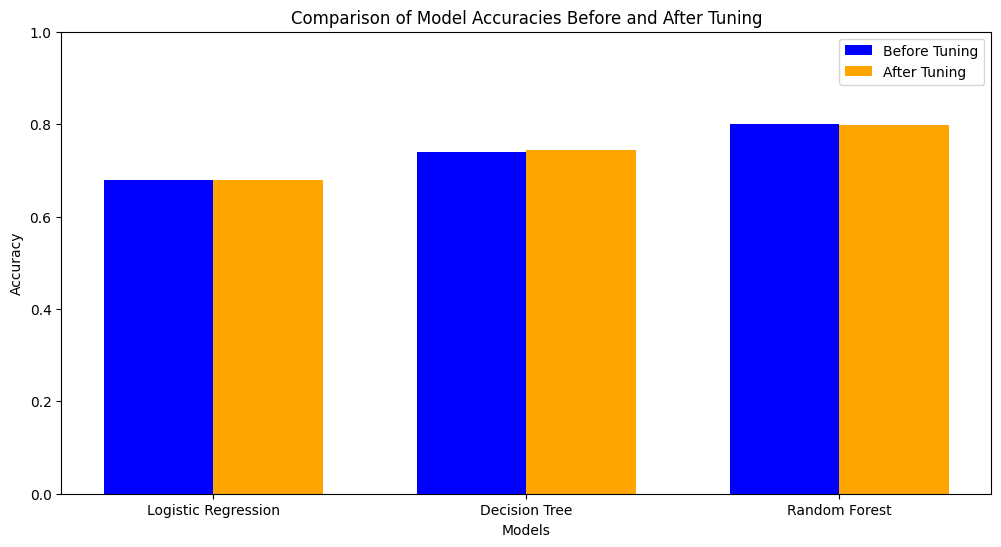

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values before tuning
accuracies_before = [accuracy_logreg, accuracy_dt, accuracy_rf]

# Accuracy values after tuning
accuracies_after = [accuracy_best_logreg, accuracy_best_dt, accuracy_best_rf]

# Model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Plotting the bar chart
bar_width = 0.35
index = np.arange(len(model_names))

plt.figure(figsize=(12, 6))
plt.bar(index, accuracies_before, width=bar_width, label='Before Tuning', color='blue')
plt.bar(index + bar_width, accuracies_after, width=bar_width, label='After Tuning', color='orange')

plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.title('Comparison of Model Accuracies Before and After Tuning')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(index + bar_width / 2, model_names)
plt.legend()
plt.show()

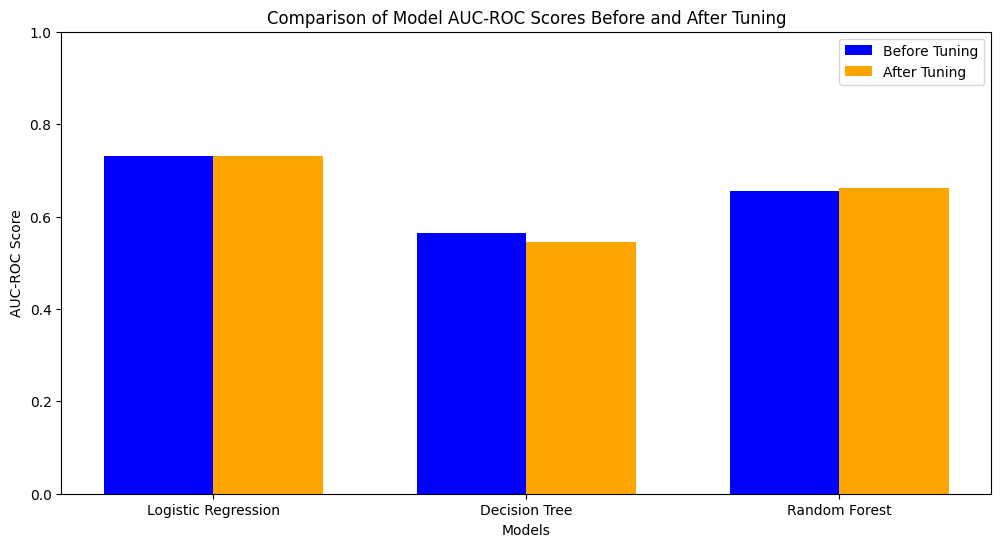

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# AUC-ROC values before tuning
auc_rocs_before = [roc_auc_logreg, roc_auc_dt, roc_auc_rf]

# AUC-ROC values after tuning
auc_rocs_after = [roc_auc_best_logreg, roc_auc_best_dt, roc_auc_best_rf]

# Model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Plotting the bar chart
bar_width = 0.35
index = np.arange(len(model_names))

plt.figure(figsize=(12, 6))
plt.bar(index, auc_rocs_before, width=bar_width, label='Before Tuning', color='blue')
plt.bar(index + bar_width, auc_rocs_after, width=bar_width, label='After Tuning', color='orange')

plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.title('Comparison of Model AUC-ROC Scores Before and After Tuning')
plt.xlabel('Models')
plt.ylabel('AUC-ROC Score')
plt.xticks(index + bar_width / 2, model_names)
plt.legend()
plt.show()

When we observe a situation where the normal accuracy is low, but the ROC-AUC score is high, it indicates a potential imbalance in the class distribution of your dataset. This is a common scenario in imbalanced datasets, where one class (usually the minority class) has significantly fewer samples than the other.

In such cases, accuracy might not be the most informative metric because a model that predicts the majority class for every instance can still achieve a high accuracy if the dataset is imbalanced.

Here's a quick guide on how to interpret these metrics in imbalanced datasets:

1. **High ROC-AUC, Low Accuracy:**
   - **ROC-AUC:** ROC-AUC is a good metric for imbalanced datasets. A high ROC-AUC suggests that the model is good at distinguishing between the positive and negative classes.
   - **Accuracy:** In imbalanced datasets, accuracy alone might not provide a complete picture. The low accuracy could be due to the imbalance, where the majority class dominates the predictions.

2. **Choosing the Best Model:**
   - **Consider the Business Context:** Depending on the specific goals and costs associated with false positives and false negatives in your application, you may prioritize precision, recall, or another metric.
   - **Use Multiple Metrics:** Evaluate multiple metrics (precision, recall, F1-score) in addition to accuracy and ROC-AUC to get a comprehensive understanding of your model's performance.

3. **Adjusting for Imbalance:**
   - **Class Weights:** In some models, you can assign different weights to classes to account for imbalance.
   - **Sampling Techniques:** Consider using resampling techniques like oversampling the minority class or undersampling the majority class.

4. **Precision-Recall Curve:**
   - **Plotting Precision-Recall Curve:** In imbalanced datasets, it's often informative to look at the precision-recall curve in addition to the ROC curve.

In summary, a high ROC-AUC is a positive sign, but you should also consider other metrics and explore techniques to handle class imbalance. The best model depends on the specific goals and constraints of your problem.

##ENSEMBLE BOOSTING MODELS

### Model 4 - AdaBoost

Accuracy (AdaBoost): 0.6814159292035398

Confusion Matrix (AdaBoost):
 [[401 180]
 [ 36  61]]

Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       0.92      0.69      0.79       581
           1       0.25      0.63      0.36        97

    accuracy                           0.68       678
   macro avg       0.59      0.66      0.57       678
weighted avg       0.82      0.68      0.73       678



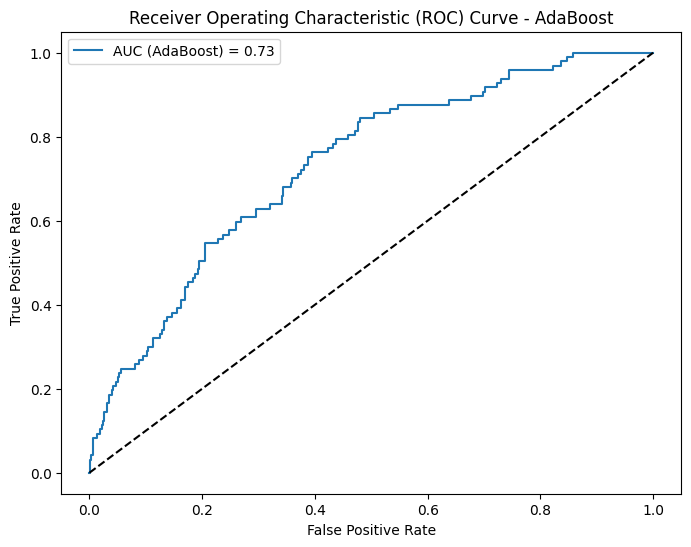

AUC-ROC Score (AdaBoost): 0.7312490018986105


In [109]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a base classifier (Logistic Regression with L2 regularization)
base_classifier = LogisticRegression(penalty='l2', random_state=42)

# Create an AdaBoost classifier with the base classifier
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the model on the resampled training data
adaboost_model.fit(X_train_resampled_df, y_train_resampled_df)

# Make predictions on the original test set
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
class_report_adaboost = classification_report(y_test, y_pred_adaboost)

# Print evaluation metrics for the AdaBoost model
print("Accuracy (AdaBoost):", accuracy_adaboost)
print("\nConfusion Matrix (AdaBoost):\n", conf_matrix_adaboost)
print("\nClassification Report (AdaBoost):\n", class_report_adaboost)

# Predict probabilities for the positive class
y_prob_adaboost = adaboost_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, y_prob_adaboost)
roc_auc_adaboost = roc_auc_score(y_test, y_prob_adaboost)

# Plot the ROC curve for the AdaBoost model
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AUC (AdaBoost) = {roc_auc_adaboost:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.legend()
plt.show()

# Print AUC-ROC score for the AdaBoost model
print("AUC-ROC Score (AdaBoost):", roc_auc_adaboost)

Best Hyperparameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 150}
Accuracy (AdaBoost - Best Model): 0.6710914454277286

Confusion Matrix (AdaBoost - Best Model):
 [[394 187]
 [ 36  61]]

Classification Report (AdaBoost - Best Model):
               precision    recall  f1-score   support

           0       0.92      0.68      0.78       581
           1       0.25      0.63      0.35        97

    accuracy                           0.67       678
   macro avg       0.58      0.65      0.57       678
weighted avg       0.82      0.67      0.72       678



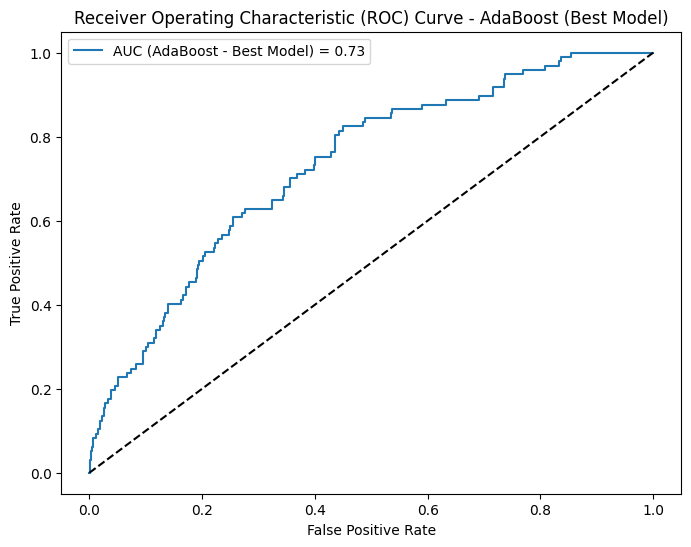

AUC-ROC Score (AdaBoost - Best Model): 0.7309828415281153


In [110]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [150,200,250,300],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Create the AdaBoost classifier
adaboost_model = AdaBoostClassifier(base_classifier, random_state=42)

# Create GridSearchCV
grid_search_adaboost = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model to the resampled training data
grid_search_adaboost.fit(X_train_resampled_df, y_train_resampled_df)

# Get the best hyperparameters
best_params_adaboost = grid_search_adaboost.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for AdaBoost:", best_params_adaboost)

# Make predictions on the original test set using the best model
y_pred_adaboost_best = grid_search_adaboost.predict(X_test)

# Evaluate the AdaBoost model with the best hyperparameters
accuracy_adaboost_best = accuracy_score(y_test, y_pred_adaboost_best)
conf_matrix_adaboost_best = confusion_matrix(y_test, y_pred_adaboost_best)
class_report_adaboost_best = classification_report(y_test, y_pred_adaboost_best)

# Print evaluation metrics for the AdaBoost model with the best hyperparameters
print("Accuracy (AdaBoost - Best Model):", accuracy_adaboost_best)
print("\nConfusion Matrix (AdaBoost - Best Model):\n", conf_matrix_adaboost_best)
print("\nClassification Report (AdaBoost - Best Model):\n", class_report_adaboost_best)

# Predict probabilities for the positive class using the best model
y_prob_adaboost_best = grid_search_adaboost.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score for the best model
fpr_adaboost_best, tpr_adaboost_best, thresholds_adaboost_best = roc_curve(y_test, y_prob_adaboost_best)
roc_auc_adaboost_best = roc_auc_score(y_test, y_prob_adaboost_best)

# Plot the ROC curve for the best AdaBoost model
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost_best, tpr_adaboost_best, label=f'AUC (AdaBoost - Best Model) = {roc_auc_adaboost_best:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost (Best Model)')
plt.legend()
plt.show()

# Print AUC-ROC score for the best AdaBoost model
print("AUC-ROC Score (AdaBoost - Best Model):", roc_auc_adaboost_best)

### Model 5 - Gradient Boosting

Accuracy (Gradient Boosting): 0.7374631268436578

Confusion Matrix (Gradient Boosting):
 [[453 128]
 [ 50  47]]

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.90      0.78      0.84       581
           1       0.27      0.48      0.35        97

    accuracy                           0.74       678
   macro avg       0.58      0.63      0.59       678
weighted avg       0.81      0.74      0.77       678



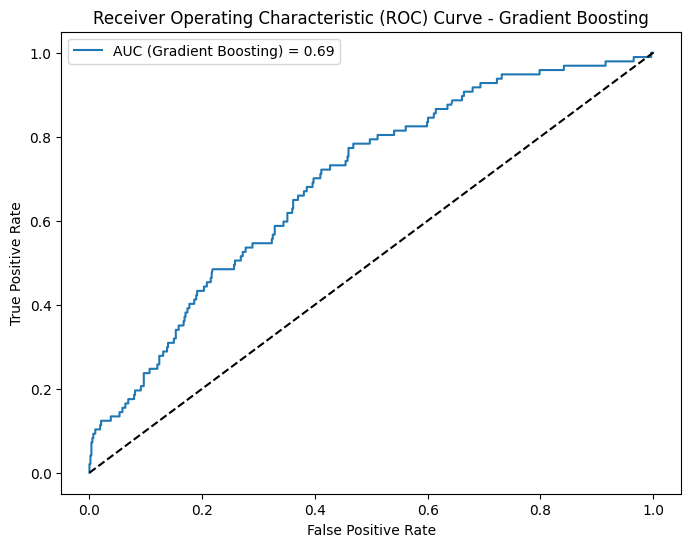

AUC-ROC Score (Gradient Boosting): 0.6917685469418173


In [111]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a Gradient Boosting classifier
gradient_boosting_model = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Train the model on the resampled training data
gradient_boosting_model.fit(X_train_resampled_df, y_train_resampled_df)

# Make predictions on the original test set
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
conf_matrix_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)
class_report_gradient_boosting = classification_report(y_test, y_pred_gradient_boosting)

# Print evaluation metrics for the Gradient Boosting model
print("Accuracy (Gradient Boosting):", accuracy_gradient_boosting)
print("\nConfusion Matrix (Gradient Boosting):\n", conf_matrix_gradient_boosting)
print("\nClassification Report (Gradient Boosting):\n", class_report_gradient_boosting)

# Predict probabilities for the positive class
y_prob_gradient_boosting = gradient_boosting_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_gradient_boosting, tpr_gradient_boosting, thresholds_gradient_boosting = roc_curve(y_test, y_prob_gradient_boosting)
roc_auc_gradient_boosting = roc_auc_score(y_test, y_prob_gradient_boosting)

# Plot the ROC curve for the Gradient Boosting model
plt.figure(figsize=(8, 6))
plt.plot(fpr_gradient_boosting, tpr_gradient_boosting, label=f'AUC (Gradient Boosting) = {roc_auc_gradient_boosting:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend()
plt.show()

# Print AUC-ROC score for the Gradient Boosting model
print("AUC-ROC Score (Gradient Boosting):", roc_auc_gradient_boosting)

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

# Create a Gradient Boosting classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Create GridSearchCV
grid_search_gradient_boosting = GridSearchCV(gradient_boosting_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model to the resampled training data
grid_search_gradient_boosting.fit(X_train_resampled_df, y_train_resampled_df)

# Get the best hyperparameters
best_params_gradient_boosting = grid_search_gradient_boosting.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for Gradient Boosting:", best_params_gradient_boosting)

# Make predictions on the original test set using the best model
y_pred_gradient_boosting_best = grid_search_gradient_boosting.predict(X_test)

# Evaluate the Gradient Boosting model with the best hyperparameters
accuracy_gradient_boosting_best = accuracy_score(y_test, y_pred_gradient_boosting_best)
roc_auc_gradient_boosting_best = roc_auc_score(y_test, y_pred_gradient_boosting_best)

# Print evaluation metrics for the best Gradient Boosting model
print("Accuracy (Gradient Boosting - Best Model):", accuracy_gradient_boosting_best)
print("AUC-ROC Score (Gradient Boosting - Best Model):", roc_auc_gradient_boosting_best)

Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Accuracy (Gradient Boosting - Best Model): 0.8244837758112095
AUC-ROC Score (Gradient Boosting - Best Model): 0.5583600972372554


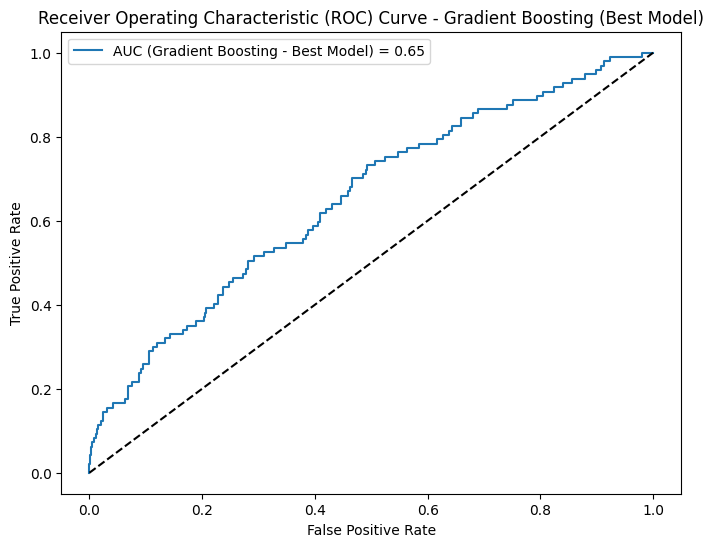

AUC-ROC Score (Gradient Boosting - Best Model): 0.6514186347747396


In [113]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class using the best model
y_prob_gradient_boosting_best = grid_search_gradient_boosting.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_gradient_boosting_best, tpr_gradient_boosting_best, thresholds_gradient_boosting_best = roc_curve(y_test, y_prob_gradient_boosting_best)
roc_auc_gradient_boosting_best = roc_auc_score(y_test, y_prob_gradient_boosting_best)

# Plot the ROC curve for the best Gradient Boosting model
plt.figure(figsize=(8, 6))
plt.plot(fpr_gradient_boosting_best, tpr_gradient_boosting_best, label=f'AUC (Gradient Boosting - Best Model) = {roc_auc_gradient_boosting_best:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting (Best Model)')
plt.legend()
plt.show()

# Print AUC-ROC score for the best Gradient Boosting model
print("AUC-ROC Score (Gradient Boosting - Best Model):", roc_auc_gradient_boosting_best)

### Model 6 - XG Boosting

Accuracy (XGBoost): 0.8215339233038348

Confusion Matrix (XGBoost):
 [[537  44]
 [ 77  20]]

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       581
           1       0.31      0.21      0.25        97

    accuracy                           0.82       678
   macro avg       0.59      0.57      0.57       678
weighted avg       0.79      0.82      0.81       678



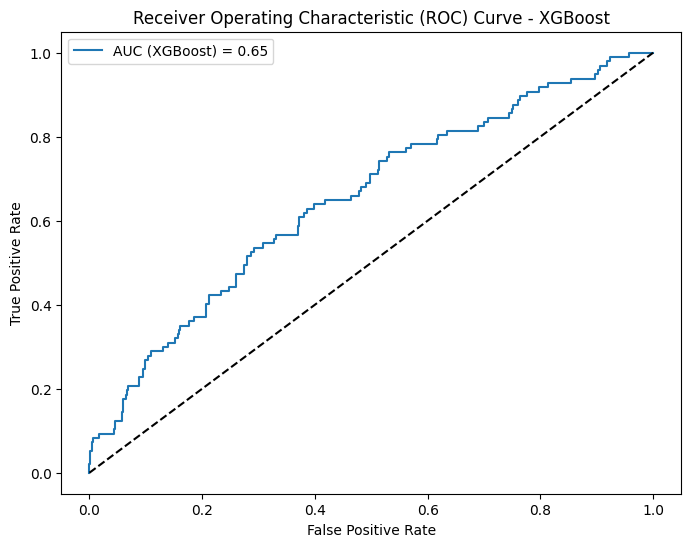

AUC-ROC Score (XGBoost): 0.6510992423301453


In [114]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model on the resampled training data
xgb_model.fit(X_train_resampled_df, y_train_resampled_df)

# Make predictions on the original test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Print evaluation metrics for the XGBoost model
print("Accuracy (XGBoost):", accuracy_xgb)
print("\nConfusion Matrix (XGBoost):\n", conf_matrix_xgb)
print("\nClassification Report (XGBoost):\n", class_report_xgb)

# Predict probabilities for the positive class
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Plot the ROC curve for the XGBoost model
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC (XGBoost) = {roc_auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend()
plt.show()

# Print AUC-ROC score for the XGBoost model
print("AUC-ROC Score (XGBoost):", roc_auc_xgb)

Best Hyperparameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Accuracy (XGBoost - Best Model): 0.8171091445427728
AUC-ROC Score (XGBoost - Best Model): 0.5583512252249054


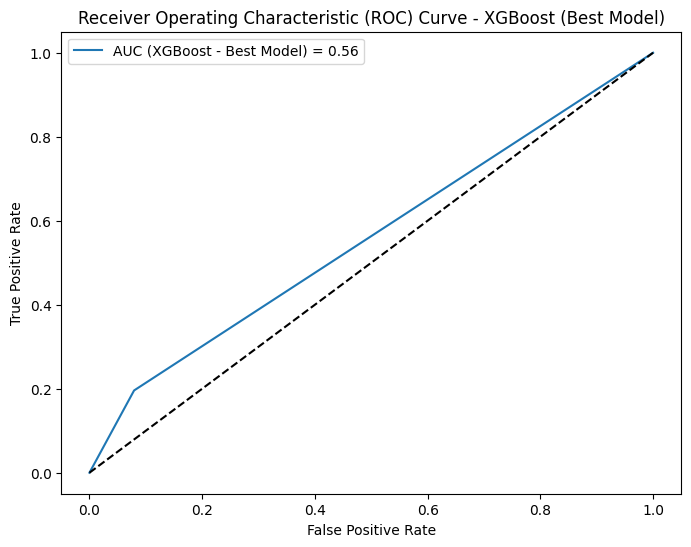

In [115]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

# Create an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Create GridSearchCV
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model to the resampled training data
grid_search_xgb.fit(X_train_resampled_df, y_train_resampled_df)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for XGBoost:", best_params_xgb)

# Make predictions on the original test set using the best model
y_pred_xgb_best = grid_search_xgb.predict(X_test)

# Evaluate the XGBoost model with the best hyperparameters
accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
roc_auc_xgb_best = roc_auc_score(y_test, y_pred_xgb_best)

# Print evaluation metrics for the best XGBoost model
print("Accuracy (XGBoost - Best Model):", accuracy_xgb_best)
print("AUC-ROC Score (XGBoost - Best Model):", roc_auc_xgb_best)

# Plot the ROC curve for the best XGBoost model
fpr_xgb_best, tpr_xgb_best, thresholds_xgb_best = roc_curve(y_test, y_pred_xgb_best)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_best, tpr_xgb_best, label=f'AUC (XGBoost - Best Model) = {roc_auc_xgb_best:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost (Best Model)')
plt.legend()
plt.show()

## NON LINEAR MODELS

### Model 6 - KNN Classifier

Accuracy (KNN): 0.6415929203539823

Confusion Matrix (KNN):
 [[390 191]
 [ 52  45]]

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.88      0.67      0.76       581
           1       0.19      0.46      0.27        97

    accuracy                           0.64       678
   macro avg       0.54      0.57      0.52       678
weighted avg       0.78      0.64      0.69       678



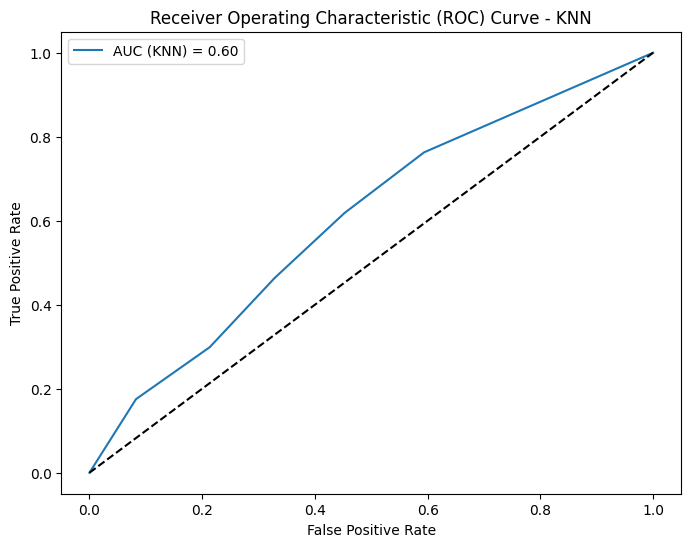

AUC-ROC Score (KNN): 0.6048405699380733


In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a KNN classifier
knn_model = KNeighborsClassifier()

# Train the model on the resampled training data
knn_model.fit(X_train_resampled_df, y_train_resampled_df)

# Make predictions on the original test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Print evaluation metrics for the KNN model
print("Accuracy (KNN):", accuracy_knn)
print("\nConfusion Matrix (KNN):\n", conf_matrix_knn)
print("\nClassification Report (KNN):\n", class_report_knn)

# Predict probabilities for the positive class
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

# Plot the ROC curve for the KNN model
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN) = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend()
plt.show()

# Print AUC-ROC score for the KNN model
print("AUC-ROC Score (KNN):", roc_auc_knn)


Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy (KNN - Best Model): 0.6327433628318584
AUC-ROC Score (KNN - Best Model): 0.5624234788934827


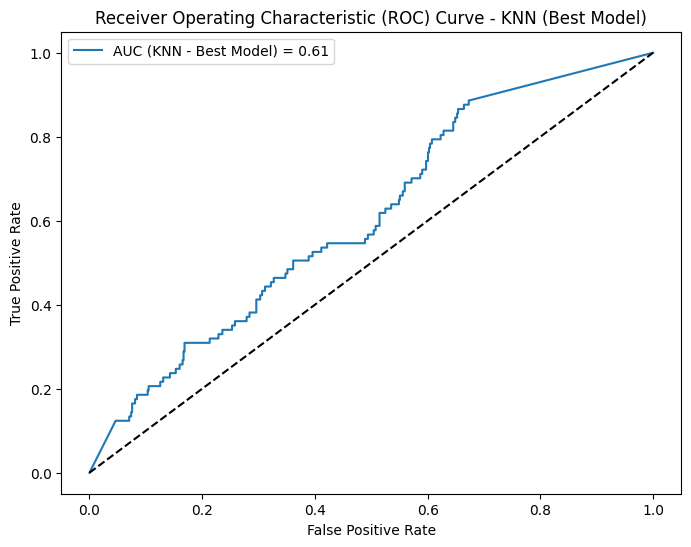

In [117]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust the values as needed
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN classifier
knn_model = KNeighborsClassifier()

# Create GridSearchCV
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model to the resampled training data
grid_search_knn.fit(X_train_resampled_df, y_train_resampled_df)

# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for KNN:", best_params_knn)

# Make predictions on the test set
y_pred_knn_best = grid_search_knn.predict(X_test)

# Evaluate the KNN model with best hyperparameters
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
roc_auc_knn_best = roc_auc_score(y_test, y_pred_knn_best)

# Print evaluation metrics for the best KNN model
print("Accuracy (KNN - Best Model):", accuracy_knn_best)
print("AUC-ROC Score (KNN - Best Model):", roc_auc_knn_best)

from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class using the best KNN model
y_prob_knn_best = grid_search_knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_knn_best, tpr_knn_best, thresholds_knn_best = roc_curve(y_test, y_prob_knn_best)
roc_auc_knn_best = auc(fpr_knn_best, tpr_knn_best)

# Plot the ROC curve for the best KNN model
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_best, tpr_knn_best, label=f'AUC (KNN - Best Model) = {roc_auc_knn_best:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN (Best Model)')
plt.legend()
plt.show()


### Model 7 - Naive Bayes Classifier

Accuracy (Naive Bayes): 0.7212389380530974

Confusion Matrix (Naive Bayes):
 [[443 138]
 [ 51  46]]

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.90      0.76      0.82       581
           1       0.25      0.47      0.33        97

    accuracy                           0.72       678
   macro avg       0.57      0.62      0.58       678
weighted avg       0.80      0.72      0.75       678



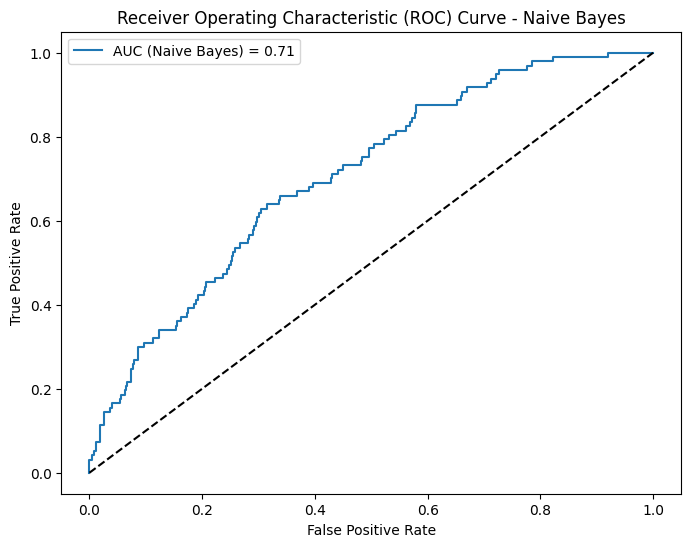

AUC-ROC Score (Naive Bayes): 0.7067090157389498


In [118]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a Gaussian Naive Bayes classifier
naive_bayes_model = GaussianNB()

# Train the model on the resampled training data
naive_bayes_model.fit(X_train_resampled_df, y_train_resampled_df)

# Make predictions on the original test set
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

# Evaluate the Naive Bayes model
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
conf_matrix_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)
class_report_naive_bayes = classification_report(y_test, y_pred_naive_bayes)

# Print evaluation metrics for the Naive Bayes model
print("Accuracy (Naive Bayes):", accuracy_naive_bayes)
print("\nConfusion Matrix (Naive Bayes):\n", conf_matrix_naive_bayes)
print("\nClassification Report (Naive Bayes):\n", class_report_naive_bayes)

# Predict probabilities for the positive class
y_prob_naive_bayes = naive_bayes_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_naive_bayes, tpr_naive_bayes, thresholds_naive_bayes = roc_curve(y_test, y_prob_naive_bayes)
roc_auc_naive_bayes = roc_auc_score(y_test, y_prob_naive_bayes)

# Plot the ROC curve for the Naive Bayes model
plt.figure(figsize=(8, 6))
plt.plot(fpr_naive_bayes, tpr_naive_bayes, label=f'AUC (Naive Bayes) = {roc_auc_naive_bayes:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend()
plt.show()

# Print AUC-ROC score for the Naive Bayes model
print("AUC-ROC Score (Naive Bayes):", roc_auc_naive_bayes)

In [119]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
import numpy as np

# Create a Gaussian Naive Bayes classifier
naive_bayes_model = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid_naive_bayes = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Create StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search_naive_bayes = GridSearchCV(naive_bayes_model, param_grid_naive_bayes, cv=stratified_kfold, scoring='roc_auc', n_jobs=-1)

# Fit the model to the resampled training data
grid_search_naive_bayes.fit(X_train_resampled_df, y_train_resampled_df)

# Get the best hyperparameters
best_params_naive_bayes = grid_search_naive_bayes.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for Naive Bayes:", best_params_naive_bayes)

# Make predictions on the test set
y_prob_naive_bayes_best = grid_search_naive_bayes.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score for the best Naive Bayes model
roc_auc_naive_bayes_best = roc_auc_score(y_test, y_prob_naive_bayes_best)

# Print AUC-ROC score for the best Naive Bayes model
print("AUC-ROC Score (Naive Bayes - Best Model):", roc_auc_naive_bayes_best)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Make predictions on the test set using the best Naive Bayes model
y_pred_naive_bayes_best = grid_search_naive_bayes.predict(X_test)

# Evaluate the Naive Bayes model with the best hyperparameters
accuracy_naive_bayes_best = accuracy_score(y_test, y_pred_naive_bayes_best)
conf_matrix_naive_bayes_best = confusion_matrix(y_test, y_pred_naive_bayes_best)
class_report_naive_bayes_best = classification_report(y_test, y_pred_naive_bayes_best)

# Print evaluation metrics for the best Naive Bayes model
print("Accuracy (Naive Bayes - Best Model):", accuracy_naive_bayes_best)
print("\nConfusion Matrix (Naive Bayes - Best Model):\n", conf_matrix_naive_bayes_best)
print("\nClassification Report (Naive Bayes - Best Model):\n", class_report_naive_bayes_best)


Best Hyperparameters for Naive Bayes: {'var_smoothing': 0.0005336699231206307}
AUC-ROC Score (Naive Bayes - Best Model): 0.7067445037883492
Accuracy (Naive Bayes - Best Model): 0.7212389380530974

Confusion Matrix (Naive Bayes - Best Model):
 [[443 138]
 [ 51  46]]

Classification Report (Naive Bayes - Best Model):
               precision    recall  f1-score   support

           0       0.90      0.76      0.82       581
           1       0.25      0.47      0.33        97

    accuracy                           0.72       678
   macro avg       0.57      0.62      0.58       678
weighted avg       0.80      0.72      0.75       678



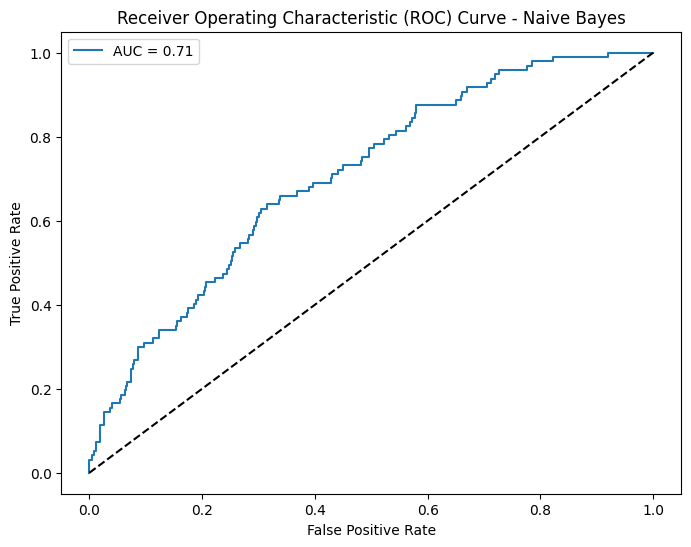

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_naive_bayes_best)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend()
plt.show()


###Model 8 - SVM CLASSIFIER

Accuracy (SVM): 0.6784660766961652

Confusion Matrix (SVM):
 [[416 165]
 [ 53  44]]

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.89      0.72      0.79       581
           1       0.21      0.45      0.29        97

    accuracy                           0.68       678
   macro avg       0.55      0.58      0.54       678
weighted avg       0.79      0.68      0.72       678



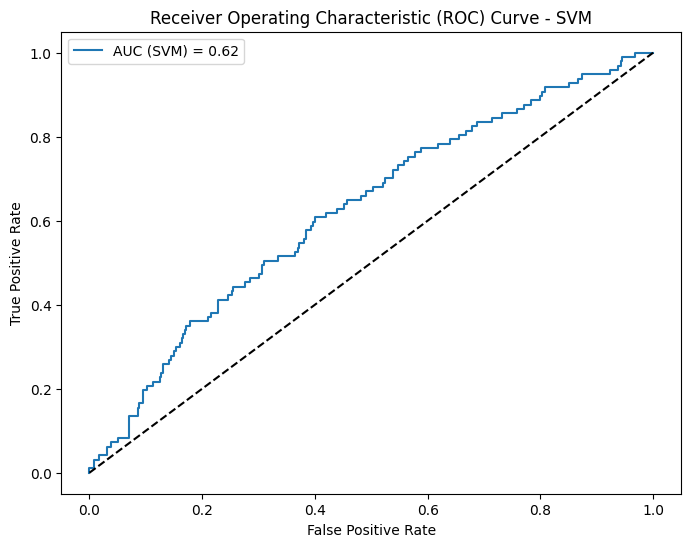

AUC-ROC Score (SVM): 0.6241638128360274


In [121]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_model = SVC(probability=True, random_state=42)

# Train the model on the resampled training data
svm_model.fit(X_train_resampled_df, y_train_resampled_df)

# Make predictions on the original test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print evaluation metrics for the SVM model
print("Accuracy (SVM):", accuracy_svm)
print("\nConfusion Matrix (SVM):\n", conf_matrix_svm)
print("\nClassification Report (SVM):\n", class_report_svm)

# Predict probabilities for the positive class
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plot the ROC curve for the SVM model
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'AUC (SVM) = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend()
plt.show()

# Print AUC-ROC score for the SVM model
print("AUC-ROC Score (SVM):", roc_auc_svm)

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define the parameter grid for hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# Create GridSearchCV with StratifiedKFold for cross-validation
grid_search_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=stratified_kfold, scoring='roc_auc', n_jobs=-1)

# Fit the model to the resampled training data
grid_search_svm.fit(X_train_resampled_df, y_train_resampled_df)

# Get the best hyperparameters
best_params_svm = grid_search_svm.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for SVM:", best_params_svm)

# Make predictions on the test set
y_prob_svm_best = grid_search_svm.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score for the best SVM model
roc_auc_svm_best = roc_auc_score(y_test, y_prob_svm_best)

# Print AUC-ROC score for the best SVM model
print("AUC-ROC Score (SVM - Best Model):", roc_auc_svm_best)

# Make predictions on the test set using the best SVM model
y_pred_svm_best = grid_search_svm.predict(X_test)

# Evaluate the SVM model with the best hyperparameters
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
conf_matrix_svm_best = confusion_matrix(y_test, y_pred_svm_best)
class_report_svm_best = classification_report(y_test, y_pred_svm_best)

# Print evaluation metrics for the best SVM model
print("Accuracy (SVM - Best Model):", accuracy_svm_best)
print("\nConfusion Matrix (SVM - Best Model):\n", conf_matrix_svm_best)
print("\nClassification Report (SVM - Best Model):\n", class_report_svm_best)

Best Hyperparameters for SVM: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
AUC-ROC Score (SVM - Best Model): 0.5744539276398672
Accuracy (SVM - Best Model): 0.6814159292035398

Confusion Matrix (SVM - Best Model):
 [[431 150]
 [ 66  31]]

Classification Report (SVM - Best Model):
               precision    recall  f1-score   support

           0       0.87      0.74      0.80       581
           1       0.17      0.32      0.22        97

    accuracy                           0.68       678
   macro avg       0.52      0.53      0.51       678
weighted avg       0.77      0.68      0.72       678



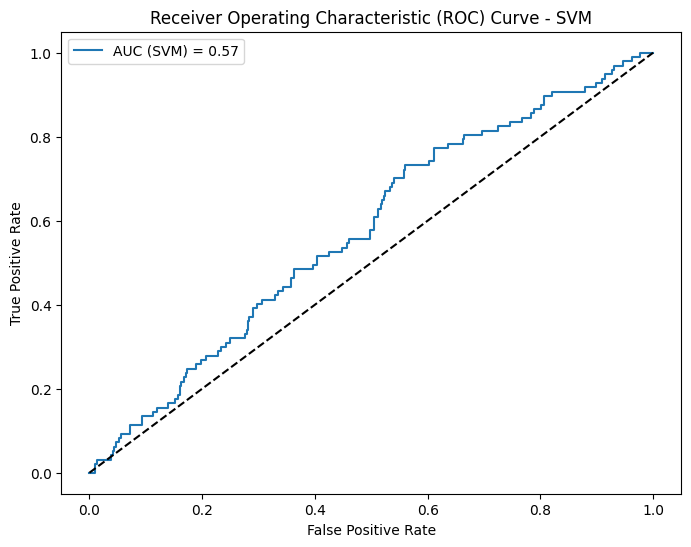

AUC-ROC Score (SVM): 0.5744450556275174


In [124]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class using the best SVM model
y_prob_svm_best = grid_search_svm.decision_function(X_test)

# Calculate ROC curve and score
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm_best)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm_best)

# Plot the ROC curve for the SVM model
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'AUC (SVM) = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend()
plt.show()

# Print AUC-ROC score for the SVM model
print("AUC-ROC Score (SVM):", roc_auc_svm)

###Model 9 - Neural Network

Accuracy (Neural Network): 0.6932153392330384

Confusion Matrix (Neural Network):
 [[432 149]
 [ 59  38]]

Classification Report (Neural Network):
               precision    recall  f1-score   support

           0       0.88      0.74      0.81       581
           1       0.20      0.39      0.27        97

    accuracy                           0.69       678
   macro avg       0.54      0.57      0.54       678
weighted avg       0.78      0.69      0.73       678



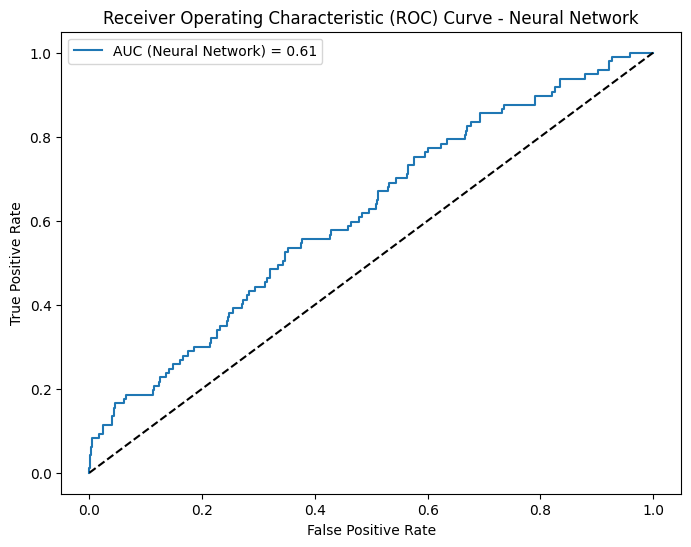

AUC-ROC Score (Neural Network): 0.6145820394981989


In [125]:
from sklearn.neural_network import MLPClassifier

# Set up a basic neural network model
nn_model = MLPClassifier(random_state=42)

# Train the model on the resampled data
nn_model.fit(X_train_resampled_df, y_train_resampled_df)

# Make predictions on the original test set
y_pred_nn = nn_model.predict(X_test)

# Evaluate the neural network model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)

# Print evaluation metrics for the neural network model
print("Accuracy (Neural Network):", accuracy_nn)
print("\nConfusion Matrix (Neural Network):\n", conf_matrix_nn)
print("\nClassification Report (Neural Network):\n", class_report_nn)

# Predict probabilities for the positive class
y_prob_nn = nn_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_prob_nn)
roc_auc_nn = roc_auc_score(y_test, y_prob_nn)

# Plot the ROC curve for the neural network model
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f'AUC (Neural Network) = {roc_auc_nn:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend()
plt.show()

# Print AUC-ROC score for the neural network model
print("AUC-ROC Score (Neural Network):", roc_auc_nn)

In [126]:
from sklearn.neural_network import MLPClassifier

# Set up neural network model
nn_model = MLPClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01],
}

# Set up GridSearchCV
grid_search_nn = GridSearchCV(estimator=nn_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the resampled data
grid_search_nn.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_nn.best_params_)

# Get the best model from GridSearchCV
best_nn_model = grid_search_nn.best_estimator_

# Perform cross-validation on the best model
cv_scores_nn = cross_val_score(best_nn_model, X_train_resampled_df, y_train_resampled_df, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores_nn)
print("Mean Cross-Validation Score:", cv_scores_nn.mean())

# Make predictions on the original test set using the best model
y_pred_best_nn = best_nn_model.predict(X_test)

# Evaluate the best neural network model
accuracy_best_nn = accuracy_score(y_test, y_pred_best_nn)
conf_matrix_best_nn = confusion_matrix(y_test, y_pred_best_nn)
class_report_best_nn = classification_report(y_test, y_pred_best_nn)

# Print evaluation metrics for the best neural network model
print("Accuracy (Best Neural Network):", accuracy_best_nn)
print("\nConfusion Matrix (Best Neural Network):\n", conf_matrix_best_nn)
print("\nClassification Report (Best Neural Network):\n", class_report_best_nn)

# Predict probabilities for the positive class
y_prob_best_nn = best_nn_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and score
fpr_best_nn, tpr_best_nn, thresholds_best_nn = roc_curve(y_test, y_prob_best_nn)
roc_auc_best_nn = roc_auc_score(y_test, y_prob_best_nn)

# Plot the ROC curve for the best neural network model
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_nn, tpr_best_nn, label=f'AUC (Best Neural Network) = {roc_auc_best_nn:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Neural Network')
plt.legend()
plt.show()

# Print AUC-ROC score for the best neural network model
print("AUC-ROC Score (Best Neural Network):", roc_auc_best_nn)

Best Hyperparameters: {'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}


NameError: ignored

## Best Model using Polynomial Features

###

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***